# **Exploración + análisis + preprocesado de los datasets**


## **Carga inicial**

In [4]:
# Rutas
import pandas as pd
import json

test_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/test_optimized.parquet'
train_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/train_optimized.parquet'
products_data_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_products_transformed.parquet'
user_details_path = '/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed_v2/optimized_users_transformed.parquet'

In [5]:
train_df = pd.read_parquet(train_data_path)
test_df = pd.read_parquet(test_data_path)
products_df = pd.read_parquet(products_data_path)
users_df = pd.read_parquet(user_details_path)

In [6]:
print(train_df.info())
print(test_df.info())
print(products_df.info())
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       int32         
 1   date             datetime64[ns]
 2   timestamp_local  datetime64[ns]
 3   add_to_cart      int8          
 4   user_id          int32         
 5   country          int8          
 6   partnumber       int32         
 7   device_type      int8          
 8   pagetype         int8          
dtypes: datetime64[ns](2), int32(3), int8(4)
memory usage: 1.4 GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   session_id       29275 non-null  int32         
 1   date             29275 non-null  datetime64[ns]
 2   timestamp_local  29275 non-null  datetime64[ns]
 3   user_id          29275 non-nul

## **Train**

### EDA

In [4]:
# Información básica del dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       int32         
 1   date             datetime64[ns]
 2   timestamp_local  datetime64[ns]
 3   add_to_cart      int8          
 4   user_id          int32         
 5   country          int8          
 6   partnumber       int32         
 7   device_type      int8          
 8   pagetype         int8          
dtypes: datetime64[ns](2), int32(3), int8(4)
memory usage: 1.4 GB


In [ ]:
# Resumen estadístico para las variables numéricas
train_df.describe()

In [8]:
# Revisión de los primeros registros
train_df.head()

,session_id,date,timestamp_local,add_to_cart,user_id,country,partnumber,device_type,pagetype
0,64,2024-06-06,2024-06-06 16:43:17.389,0,-1,29,14327,1,24
1,117,2024-06-08,2024-06-08 15:11:02.782,0,-1,57,38422,1,24
2,117,2024-06-08,2024-06-08 15:11:44.797,0,-1,57,19763,1,24
3,579,2024-06-05,2024-06-05 19:24:48.397,0,-1,29,30253,1,24
4,1220,2024-06-04,2024-06-04 08:21:13.476,0,480729,25,1592,1,24


In [9]:
# Verificación de valores nulos
train_df.isnull().sum()

session_id         0
date               0
timestamp_local    0
add_to_cart        0
user_id            0
country            0
partnumber         0
device_type        0
pagetype           0
dtype: int64

In [10]:
# Verificación de registros duplicados
train_df.duplicated().sum()

0

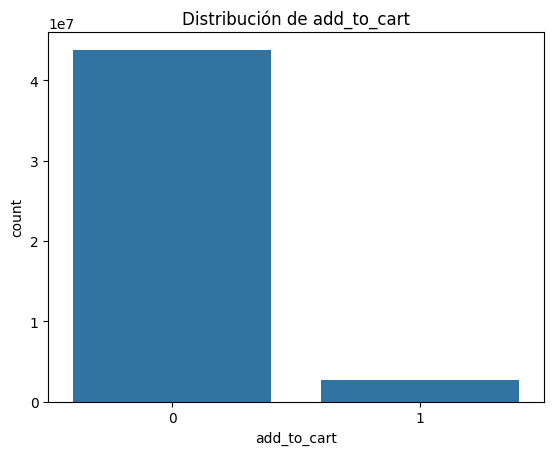

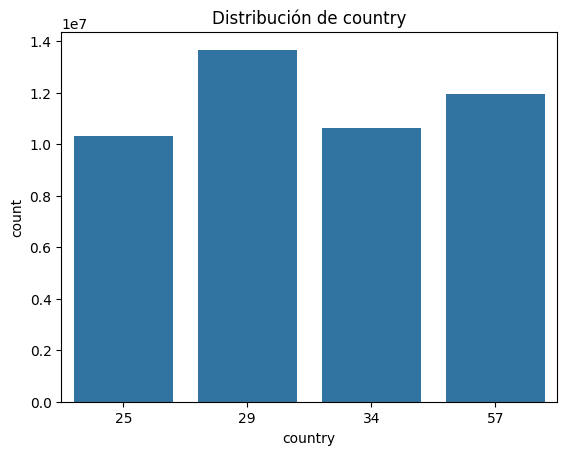

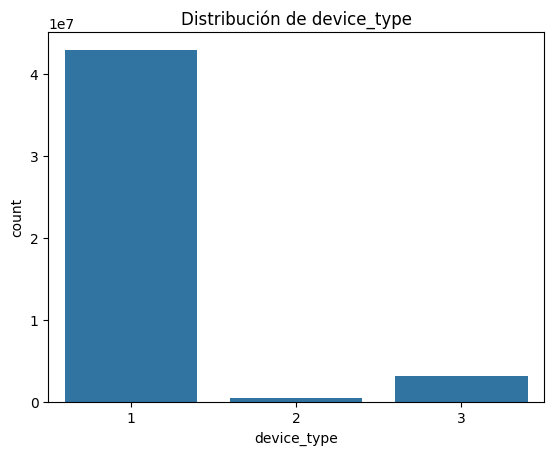

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable 'add_to_cart'
sns.countplot(x='add_to_cart', data=train_df)
plt.title('Distribución de add_to_cart')
plt.show()

# Distribución de 'country' y 'device_type'
sns.countplot(x='country', data=train_df)
plt.title('Distribución de country')
plt.show()

sns.countplot(x='device_type', data=train_df)
plt.title('Distribución de device_type')
plt.show()


### Transformación de tipo de dato

In [12]:
# Conversión de variables categóricas
train_df['country'] = train_df['country'].astype('category')
train_df['device_type'] = train_df['device_type'].astype('category')
train_df['pagetype'] = train_df['pagetype'].astype('category')

# Verificamos los cambios
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   session_id       int32         
 1   date             datetime64[ns]
 2   timestamp_local  datetime64[ns]
 3   add_to_cart      int8          
 4   user_id          int32         
 5   country          category      
 6   partnumber       int32         
 7   device_type      category      
 8   pagetype         category      
dtypes: category(3), datetime64[ns](2), int32(3), int8(1)
memory usage: 1.4 GB


In [13]:
# Revisamos el rango de las fechas para asegurarnos que todo esté correcto
train_df['date'].min(), train_df['date'].max(), train_df['timestamp_local'].min(), train_df['timestamp_local'].max()


(Timestamp('2024-06-01 00:00:00'),
 Timestamp('2024-06-16 00:00:00'),
 Timestamp('2024-06-01 02:00:00.051000'),
 Timestamp('2024-06-16 22:11:17.725000'))

### Guardamos train_cleaned

In [14]:
train_df.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/cleaned_train.parquet', index=False)

#### **Acciones Tomadas**:
1. **Exploración de Datos**: Validamos la estructura de `train_df`, confirmando que no hay valores nulos ni duplicados.
2. **Distribución de Variables**: Revisamos las distribuciones de `add_to_cart`, `country`, y `device_type`. 
   - `add_to_cart` está desbalanceada (mayoría `0`).
   - `country` tiene una distribución equilibrada.
   - `device_type` está muy sesgada (predomina un tipo de dispositivo).
3. **Conversión de Tipos de Datos**: Convertimos las columnas categóricas (`country`, `device_type`, `pagetype`) a tipo `category` para optimizar memoria.
4. **Validación de Fechas**: Comprobamos que las fechas estén correctamente formateadas como `datetime`.
5. **Guardado**: Guardamos el dataframe limpio en formato Parquet.

#### **Observaciones para el Futuro**:
1. **Desbalance de `add_to_cart`**: Es importante considerar técnicas de manejo de desbalance (oversampling, undersampling, o pesos de clase) al entrenar el modelo.
2. **Análisis Temporal**: Las fechas podrían proporcionar patrones útiles (por ejemplo, comportamiento por hora o día de la semana).
3. **Outliers**: Aunque no encontramos problemas, algunas columnas (como `user_id` o `partnumber`) podrían necesitar más revisión.
4. **Optimización**: Seguir optimizando el uso de memoria, especialmente a medida que el dataset crezca.


## **Test**

### EDA

In [15]:
# Información básica del dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   session_id       29275 non-null  int32         
 1   date             29275 non-null  datetime64[ns]
 2   timestamp_local  29275 non-null  datetime64[ns]
 3   user_id          29275 non-null  int32         
 4   country          29275 non-null  int8          
 5   partnumber       29275 non-null  int32         
 6   device_type      29275 non-null  int8          
 7   pagetype         29275 non-null  int8          
dtypes: datetime64[ns](2), int32(3), int8(3)
memory usage: 886.4 KB


In [16]:
# Resumen estadístico para las variables numéricas
test_df.describe()

,session_id,date,timestamp_local,user_id,country,partnumber,device_type,pagetype
count,2.927500e+04,29275,29275,29275.000000,29275.000000,29275.000000,29275.000000,29275.000000
mean,2.602346e+06,2024-06-15 12:09:13.373185280,2024-06-16 01:07:58.761897472,52420.586268,34.260495,22085.171238,1.213185,23.137865
min,7.460000e+02,2024-06-15 00:00:00,2024-06-15 00:00:35.309000,-1.000000,25.000000,3.000000,1.000000,1.000000
25%,1.318920e+06,2024-06-15 00:00:00,2024-06-15 13:45:43.255499776,-1.000000,25.000000,11544.500000,1.000000,24.000000
50%,2.619119e+06,2024-06-16 00:00:00,2024-06-16 00:16:00.219000064,-1.000000,34.000000,21777.000000,1.000000,24.000000
75%,3.904801e+06,2024-06-16 00:00:00,2024-06-16 14:08:17.384000,-1.000000,34.000000,32864.000000,1.000000,24.000000
max,5.168933e+06,2024-06-16 00:00:00,2024-06-16 23:55:50.519000,555819.000000,57.000000,43679.000000,3.000000,26.000000
std,1.496322e+06,NaN,NaN,126904.770441,10.539929,12502.857230,0.603799,3.671977


In [17]:
# Revisión de los primeros registros
test_df.head()

,session_id,date,timestamp_local,user_id,country,partnumber,device_type,pagetype
0,746,2024-06-15,2024-06-15 18:36:47.390,-1,57,1254,1,24
1,746,2024-06-15,2024-06-15 18:37:04.052,-1,57,32544,1,24
2,746,2024-06-15,2024-06-15 18:37:48.159,-1,57,12639,1,24
3,746,2024-06-15,2024-06-15 18:38:19.899,-1,57,18048,1,24
4,746,2024-06-15,2024-06-15 18:38:46.492,-1,57,13295,1,24


In [18]:
# Verificación de valores nulos
test_df.isnull().sum()

session_id         0
date               0
timestamp_local    0
user_id            0
country            0
partnumber         0
device_type        0
pagetype           0
dtype: int64

In [19]:
# Verificación de registros duplicados
test_df.duplicated().sum()

0

### Transformación de tipo de dato

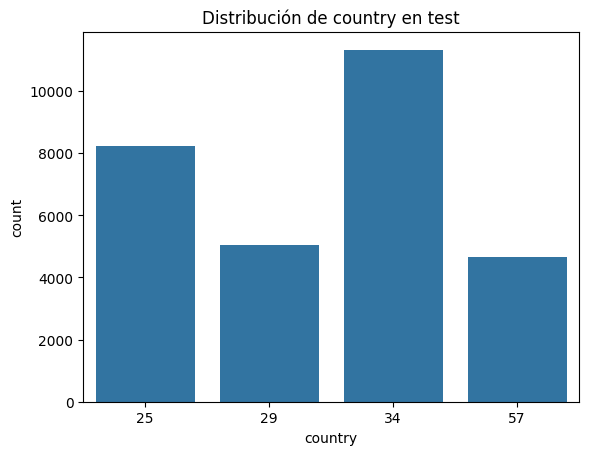

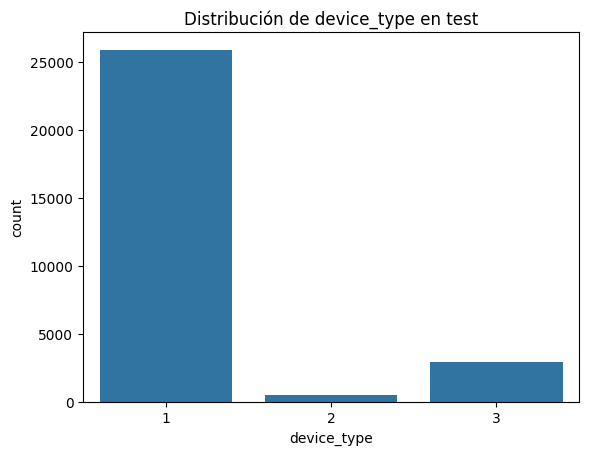

In [20]:
# Distribución de 'country' y 'device_type' en test
sns.countplot(x='country', data=test_df)
plt.title('Distribución de country en test')
plt.show()

sns.countplot(x='device_type', data=test_df)
plt.title('Distribución de device_type en test')
plt.show()


In [21]:
# Conversión de variables categóricas
test_df['country'] = test_df['country'].astype('category')
test_df['device_type'] = test_df['device_type'].astype('category')
test_df['pagetype'] = test_df['pagetype'].astype('category')

# Verificamos los cambios
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   session_id       29275 non-null  int32         
 1   date             29275 non-null  datetime64[ns]
 2   timestamp_local  29275 non-null  datetime64[ns]
 3   user_id          29275 non-null  int32         
 4   country          29275 non-null  category      
 5   partnumber       29275 non-null  int32         
 6   device_type      29275 non-null  category      
 7   pagetype         29275 non-null  category      
dtypes: category(3), datetime64[ns](2), int32(3)
memory usage: 886.8 KB


In [22]:
# Verificar formato de fechas
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['timestamp_local'] = pd.to_datetime(test_df['timestamp_local'])

# Verificamos nuevamente
test_df[['date', 'timestamp_local']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             29275 non-null  datetime64[ns]
 1   timestamp_local  29275 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 457.5 KB


### Guardamos test_cleaned

In [23]:
test_df.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/cleaned_test.parquet', index=False)

#### **Acciones Tomadas en `test_df`**:
1. **Estructura y Tipos de Datos**:
   - Se verificó que `test_df` tiene 29,275 filas y 8 columnas.
   - Las columnas `country`, `device_type`, y `pagetype` fueron convertidas a tipo `category` para optimizar la memoria.
   
2. **Distribución**:
   - La distribución de `country` es razonablemente equilibrada, con mayor número de interacciones en `34`.
   - `device_type` está muy sesgada, con la mayoría de interacciones provenientes de un solo tipo de dispositivo (`1`).

3. **Valores Nulos y Duplicados**:
   - No se encontraron valores nulos ni duplicados, todo correcto.

4. **Fechas**:
   - Las columnas `date` y `timestamp_local` están correctamente formateadas como `datetime64`.

5. **Guardado**:
   - El dataset limpio fue guardado en formato Parquet para su uso posterior.

#### **Observaciones**:
1. **Desbalance**: No hay columna `add_to_cart`, lo que es esperado en el dataset de prueba.
2. **Optimización**: La conversión de columnas a `category` y validación de fechas es correcta para optimizar el uso de memoria.
3. **Próximos Pasos**: Integrar los datos de productos y usuarios, luego proceder con el modelo de recomendación.

## **Products**

### EDA

In [10]:
# Información básica sobre el dataset de productos
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43692 entries, 0 to 43691
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   discount           43692 non-null  int8  
 1   partnumber         43692 non-null  int32 
 2   color_id           43692 non-null  object
 3   cod_section        43692 non-null  int8  
 4   family             43692 non-null  object
 5   embedding_reduced  43692 non-null  object
dtypes: int32(1), int8(2), object(3)
memory usage: 1.3+ MB


In [25]:
# Resumen estadístico de las variables numéricas
products_df.describe()

,discount,partnumber,color_id,cod_section,family
count,43692.000000,43692.000000,43692.000000,43692.000000,43692.000000
mean,0.031539,21846.500000,176.133320,2.207429,95.949922
std,0.174771,12612.938317,147.611806,1.190771,57.816870
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,10923.750000,64.000000,1.000000,51.000000
50%,0.000000,21846.500000,135.000000,2.000000,74.000000
75%,0.000000,32769.250000,307.000000,3.000000,153.000000
max,1.000000,43692.000000,638.000000,4.000000,217.000000


In [26]:
# Revisamos las primeras filas para ver qué contiene cada columna
products_df.head()

,discount,partnumber,color_id,cod_section,family,embedding_reduced
0,0,32776,85,4,73,"[1.2057567, 4.4139137, 0.20047909, -1.7359816,..."
1,0,41431,135,4,73,"[0.73362523, 5.2660265, 0.45971346, -2.701505,..."
2,0,39419,339,4,73,"[1.5594714, 5.369455, 0.9487878, -1.6584885, 0..."
3,1,36087,135,4,73,"[0.96842104, 5.47915, 0.29450747, -2.2336905, ..."
4,1,34132,3,4,73,"[1.7068874, 5.3177752, 0.527675, -2.3117814, -..."


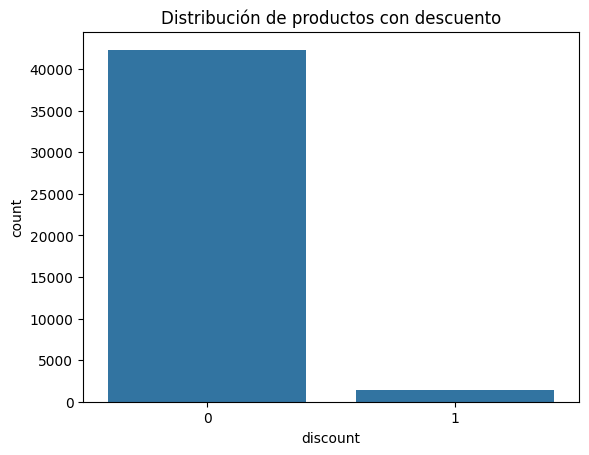

In [27]:
sns.countplot(x='discount', data=products_df)
plt.title('Distribución de productos con descuento')
plt.show()

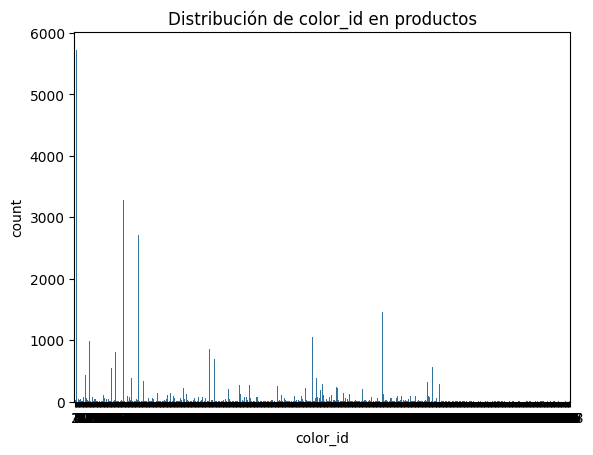

In [28]:
sns.countplot(x='color_id', data=products_df)
plt.title('Distribución de color_id en productos')
plt.show()

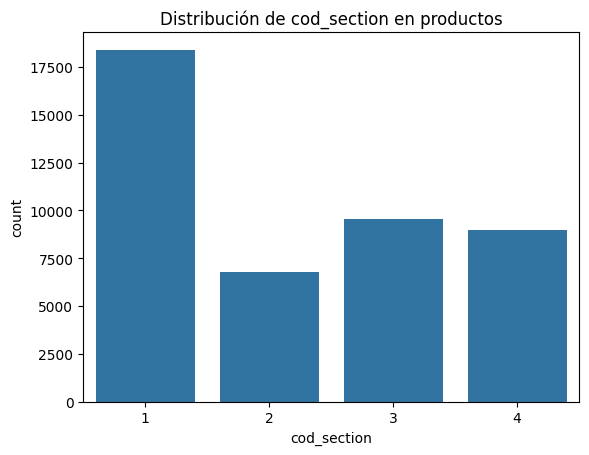

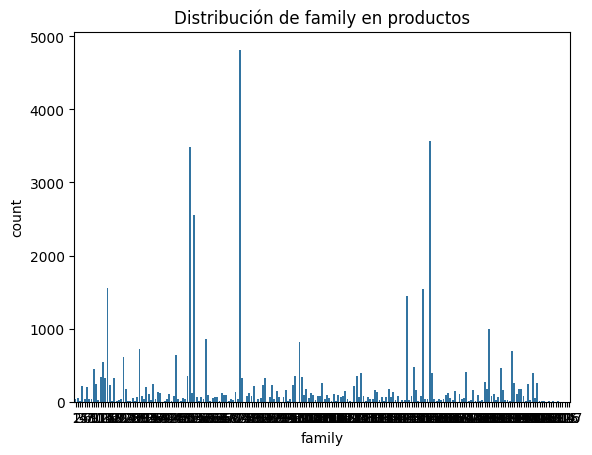

In [29]:
sns.countplot(x='cod_section', data=products_df)
plt.title('Distribución de cod_section en productos')
plt.show()

sns.countplot(x='family', data=products_df)
plt.title('Distribución de family en productos')
plt.show()

In [30]:
# Verificamos la longitud del embedding_reduced
products_df['embedding_reduced'].apply(lambda x: len(json.loads(x)) if isinstance(x, str) else 0).describe()


count    43692.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: embedding_reduced, dtype: float64

In [31]:
# Verificar valores nulos en productos
products_df.isnull().sum()


discount             0
partnumber           0
color_id             0
cod_section          0
family               0
embedding_reduced    0
dtype: int64

In [ ]:
# Verificar si hay filas duplicadas
products_df.duplicated().sum()

### Tratamiento de color_id y family / Comprobación embeddings

In [5]:
# Agrupar valores menos frecuentes en 'color_id' y 'family' como "otros"
threshold = 1000  # O el umbral que consideres adecuado
products_df['color_id'] = products_df['color_id'].apply(lambda x: x if products_df['color_id'].value_counts()[x] > threshold else 'otros')
products_df['family'] = products_df['family'].apply(lambda x: x if products_df['family'].value_counts()[x] > threshold else 'otros')

# Verificamos las primeras filas después de la transformación
products_df[['color_id', 'family']].head()


,color_id,family
0,85,73
1,otros,73
2,otros,73
3,otros,73
4,3,73


In [34]:
import numpy as np
import json

# Si 'embedding_reduced' es una cadena JSON, lo convertimos a un array de números flotantes
products_df['embedding_reduced'] = products_df['embedding_reduced'].apply(lambda x: np.array(json.loads(x)) if isinstance(x, str) else x)

# Verificamos el resultado
products_df['embedding_reduced'].head()


0    [1.2057567, 4.4139137, 0.20047909, -1.7359816,...
1    [0.73362523, 5.2660265, 0.45971346, -2.701505,...
2    [1.5594714, 5.369455, 0.9487878, -1.6584885, 0...
3    [0.96842104, 5.47915, 0.29450747, -2.2336905, ...
4    [1.7068874, 5.3177752, 0.527675, -2.3117814, -...
Name: embedding_reduced, dtype: object

In [6]:
# Revisamos el dataframe después de las transformaciones
products_df.info()
products_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43692 entries, 0 to 43691
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   discount           43692 non-null  int8  
 1   partnumber         43692 non-null  int32 
 2   color_id           43692 non-null  object
 3   cod_section        43692 non-null  int8  
 4   family             43692 non-null  object
 5   embedding_reduced  43692 non-null  object
dtypes: int32(1), int8(2), object(3)
memory usage: 1.3+ MB


,discount,partnumber,color_id,cod_section,family,embedding_reduced
0,0,32776,85,4,73,"[1.2057567, 4.4139137, 0.20047909, -1.7359816,..."
1,0,41431,otros,4,73,"[0.73362523, 5.2660265, 0.45971346, -2.701505,..."
2,0,39419,otros,4,73,"[1.5594714, 5.369455, 0.9487878, -1.6584885, 0..."
3,1,36087,otros,4,73,"[0.96842104, 5.47915, 0.29450747, -2.2336905, ..."
4,1,34132,3,4,73,"[1.7068874, 5.3177752, 0.527675, -2.3117814, -..."


In [36]:
# Verificar duplicados sin incluir la columna `embedding_reduced`
products_df.drop(columns=['embedding_reduced']).duplicated().sum()


0

In [37]:
products_df['embedding_reduced'].apply(lambda x: isinstance(x, np.ndarray)).all()


True

### One-hot Encoding color_id, family

In [38]:
# Aplicamos One-Hot Encoding a 'color_id' y 'family'
products_df = pd.get_dummies(products_df, columns=['color_id', 'family'], drop_first=True)

In [9]:
# Verificamos la estructura después de la transformación
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43692 entries, 0 to 43691
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   discount           43692 non-null  int8  
 1   partnumber         43692 non-null  int32 
 2   color_id           43692 non-null  object
 3   cod_section        43692 non-null  int8  
 4   family             43692 non-null  object
 5   embedding_reduced  43692 non-null  object
dtypes: int32(1), int8(2), object(3)
memory usage: 1.3+ MB


In [40]:
# Revisamos las primeras filas para asegurarnos de que se han generado las nuevas columnas
products_df.head()

,discount,partnumber,cod_section,embedding_reduced,color_id_64,color_id_83,color_id_85,color_id_152,color_id_307,color_id_397,color_id_otros,family_51,family_53,family_73,family_146,family_153,family_156,family_otros
0,0,32776,4,"[1.2057567, 4.4139137, 0.20047909, -1.7359816,...",False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,0,41431,4,"[0.73362523, 5.2660265, 0.45971346, -2.701505,...",False,False,False,False,False,False,True,False,False,True,False,False,False,False
2,0,39419,4,"[1.5594714, 5.369455, 0.9487878, -1.6584885, 0...",False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,36087,4,"[0.96842104, 5.47915, 0.29450747, -2.2336905, ...",False,False,False,False,False,False,True,False,False,True,False,False,False,False
4,1,34132,4,"[1.7068874, 5.3177752, 0.527675, -2.3117814, -...",False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [41]:
print(f"Número de columnas después del encoding: {len(products_df.columns)}")


Número de columnas después del encoding: 18


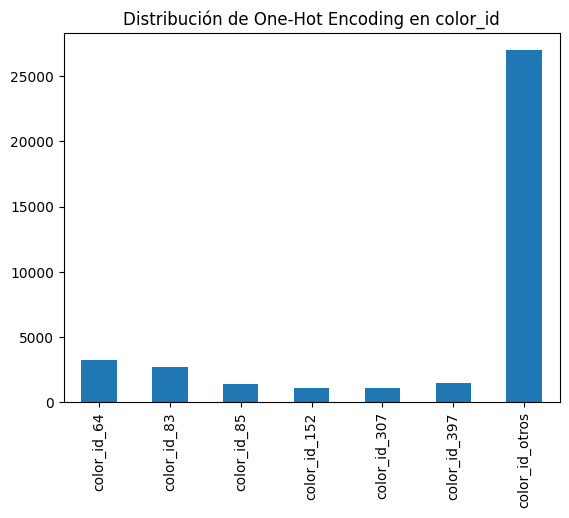

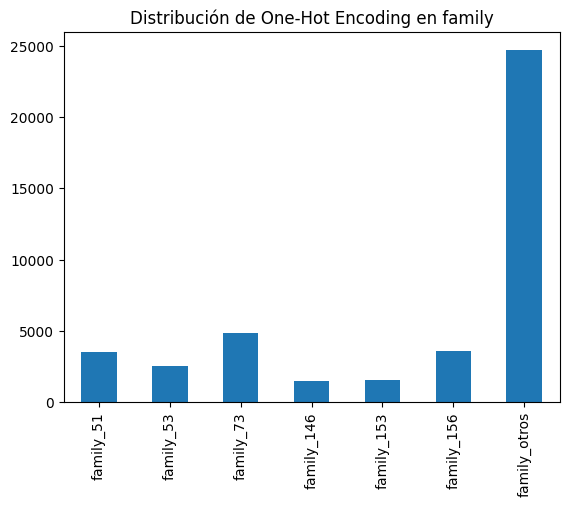

In [42]:
products_df.filter(like="color_id_").sum().plot(kind='bar', title='Distribución de One-Hot Encoding en color_id')
plt.show()

products_df.filter(like="family_").sum().plot(kind='bar', title='Distribución de One-Hot Encoding en family')
plt.show()


In [43]:
products_df.isnull().sum().sum()  # Debería dar 0 si todo está correcto


0

### Guardado de cleaned_products

In [ ]:
products_df.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/cleaned_products.parquet', index=False)


## **Merge Products con Train y Test**

### Carga datasets cleaned

In [45]:
import pandas as pd

# Cargar los datasets limpios
train_df = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/cleaned_train.parquet')
test_df = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/cleaned_test.parquet')
products_df = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/cleaned_products.parquet')

### Merge por `partnumber`

In [46]:
# Merge de train con productos
train_merged = train_df.merge(products_df, on='partnumber', how='left')

# Merge de test con productos
test_merged = test_df.merge(products_df, on='partnumber', how='left')


### Verificar el Merge

In [48]:
# Revisar estructura después del merge
print(train_merged.info())
print(test_merged.info())

# Revisar las primeras filas para asegurarnos de que los datos de productos se han añadido correctamente
print(train_merged.head())
print(test_merged.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 26 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   country            int8          
 6   partnumber         int32         
 7   device_type        int8          
 8   pagetype           int8          
 9   discount           int8          
 10  cod_section        int8          
 11  embedding_reduced  object        
 12  color_id_64        bool          
 13  color_id_83        bool          
 14  color_id_85        bool          
 15  color_id_152       bool          
 16  color_id_307       bool          
 17  color_id_397       bool          
 18  color_id_otros     bool          
 19  family_51          bool          
 20  family_53          boo

In [49]:
# Verificar si hay valores nulos después del merge
print(train_merged.isnull().sum())
print(test_merged.isnull().sum())

session_id           0
date                 0
timestamp_local      0
add_to_cart          0
user_id              0
country              0
partnumber           0
device_type          0
pagetype             0
discount             0
cod_section          0
embedding_reduced    0
color_id_64          0
color_id_83          0
color_id_85          0
color_id_152         0
color_id_307         0
color_id_397         0
color_id_otros       0
family_51            0
family_53            0
family_73            0
family_146           0
family_153           0
family_156           0
family_otros         0
dtype: int64
session_id           0
date                 0
timestamp_local      0
user_id              0
country              0
partnumber           0
device_type          0
pagetype             0
discount             0
cod_section          0
embedding_reduced    0
color_id_64          0
color_id_83          0
color_id_85          0
color_id_152         0
color_id_307         0
color_id_397         

### Guardamos el Merge

In [50]:
train_merged.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_parcial.parquet', index=False)
test_merged.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_parcial.parquet', index=False)

## **Users**

### EDA

In [51]:
# Información general del dataset
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577494 entries, 0 to 577493
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  577494 non-null  int32  
 1   country  577494 non-null  int8   
 2   R        577494 non-null  float32
 3   F        577494 non-null  float32
 4   M        577494 non-null  float32
dtypes: float32(3), int32(1), int8(1)
memory usage: 9.4 MB
None


In [52]:
# Estadísticas generales
print(users_df.describe())

             user_id        country              R              F  \
count  577494.000000  577494.000000  577494.000000  577494.000000   
mean   278298.974377      25.247495       0.428053       0.323904   
std    160779.256697       3.945214       0.235603       0.126562   
min         1.000000       1.000000       0.000000       0.000000   
25%    139100.250000      25.000000       0.255987       0.236690   
50%    278160.500000      25.000000       0.427997       0.337763   
75%    417476.750000      25.000000       0.594175       0.417015   
max    557006.000000      93.000000       1.000000       1.000000   

                   M  
count  577494.000000  
mean        0.214319  
std         0.042036  
min         0.000000  
25%         0.195382  
50%         0.213572  
75%         0.231649  
max         1.000000  


In [53]:
# Primeras filas para revisar formato
print(users_df.head())

   user_id  country         R         F         M
0   430096       25  0.420669  0.209618  0.171968
1   134018       25  0.600720  0.376652  0.214501
2    53750       25  0.156958  0.449675  0.214022
3   180665       25  0.447965  0.337763  0.220776
4   134209       25  0.297088  0.118345  0.220844


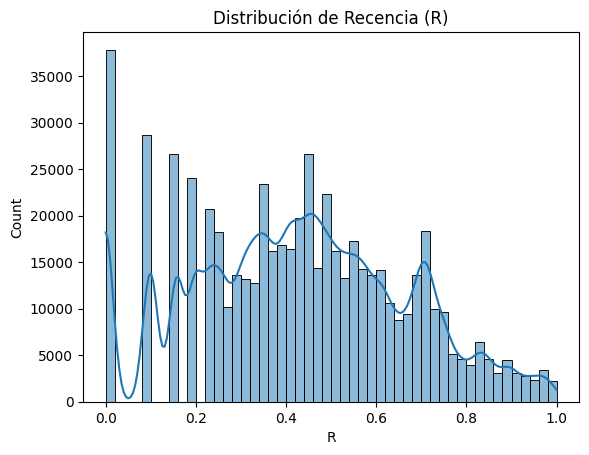

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(users_df['R'], bins=50, kde=True)
plt.title('Distribución de Recencia (R)')
plt.show()


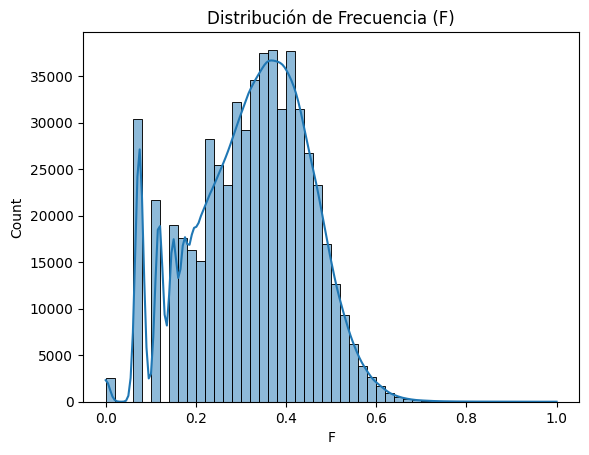

In [55]:
sns.histplot(users_df['F'], bins=50, kde=True)
plt.title('Distribución de Frecuencia (F)')
plt.show()


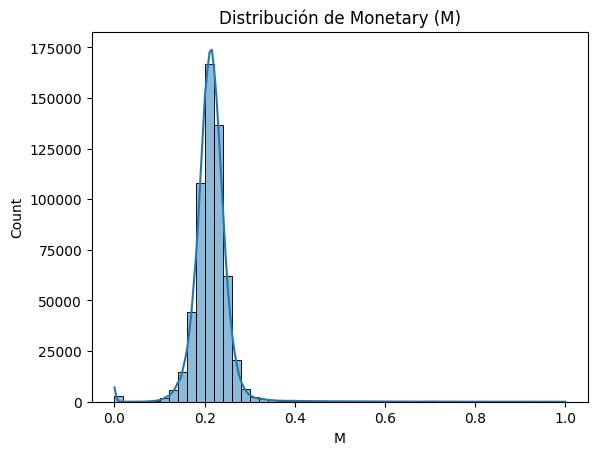

In [56]:
sns.histplot(users_df['M'], bins=50, kde=True)
plt.title('Distribución de Monetary (M)')
plt.show()


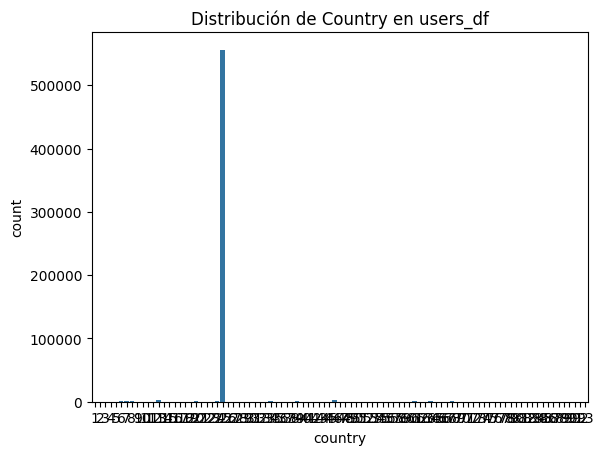

In [57]:
sns.countplot(x='country', data=users_df)
plt.title('Distribución de Country en users_df')
plt.show()

In [58]:
# Valores nulos
print(users_df.isnull().sum())

# Verificar duplicados por user_id
print(users_df.duplicated(subset=['user_id']).sum())


user_id    0
country    0
R          0
F          0
M          0
dtype: int64
20488


### Preprocesamientos de datos

In [59]:
# Agrupar `R`, `F`, `M` por user_id usando la media
users_df = users_df.groupby('user_id', as_index=False).agg({
    'country': 'first',  # Mantener el primer valor de country
    'R': 'mean',
    'F': 'mean',
    'M': 'mean'
})

# Verificar que los duplicados fueron eliminados
print(users_df.duplicated(subset=['user_id']).sum())  # Debe dar 0

0


In [60]:
# Comparar valores de country en train_merged y users_df
merged_country_check = train_merged[['user_id', 'country']].merge(
    users_df[['user_id', 'country']], on='user_id', suffixes=('_train', '_users')
)

# Ver cuántos usuarios tienen un country diferente en users_df vs train_merged
country_mismatch = merged_country_check[merged_country_check['country_train'] != merged_country_check['country_users']]
print(f"Número de discrepancias en country: {len(country_mismatch)}")


Número de discrepancias en country: 125950


In [61]:
# Decisión: eliminar country de users_df si hay muchas discrepancias
users_df.drop(columns=['country'], inplace=True)


In [62]:
print(users_df.info())  # Debe tener solo: user_id, R, F, M
print(users_df.head())  # Verificamos estructura final


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557006 entries, 0 to 557005
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  557006 non-null  int32  
 1   R        557006 non-null  float32
 2   F        557006 non-null  float32
 3   M        557006 non-null  float32
dtypes: float32(3), int32(1)
memory usage: 8.5 MB
None
   user_id         R         F         M
0        1  0.587316  0.317182  0.216860
1        2  0.156958  0.391849  0.213938
2        3  0.355016  0.449675  0.256308
3        4  0.540643  0.317182  0.248321
4        5  0.767297  0.118345  0.264555


### Guardado de cleaned_users

In [63]:
users_df.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/cleaned_users.parquet', index=False)

## **Merge de Users con train/test_final_parcial**

### Cargamos datasets

In [1]:
import pandas as pd

# Cargar train y test con productos ya integrados
train_merged = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_parcial.parquet')
test_merged = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_parcial.parquet')

# Cargar el dataset de usuarios limpio
users_df = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/cleaned_users.parquet')

# Verificamos la estructura antes del merge final
print(train_merged.info())
print(test_merged.info())
print(users_df.info())

# Mostrar algunas filas para confirmar que los datos están correctos
print(train_merged.head())
print(test_merged.head())
print(users_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 26 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   country            int8          
 6   partnumber         int32         
 7   device_type        int8          
 8   pagetype           int8          
 9   discount           int8          
 10  cod_section        int8          
 11  embedding_reduced  object        
 12  color_id_64        bool          
 13  color_id_83        bool          
 14  color_id_85        bool          
 15  color_id_152       bool          
 16  color_id_307       bool          
 17  color_id_397       bool          
 18  color_id_otros     bool          
 19  family_51          bool          
 20  family_53          boo

### Merge por `user_id`

In [2]:
# Merge de train con users
train_final = train_merged.merge(users_df, on='user_id', how='left')

# Merge de test con users
test_final = test_merged.merge(users_df, on='user_id', how='left')


In [5]:
# Revisar estructura después del merge
print(train_final.info())
print(test_final.info())

# Revisar si hay valores nulos en R, F, M
print("\nVALORES NULOS")
print(train_final[['R', 'F', 'M']].isnull().sum())
print(test_final[['R', 'F', 'M']].isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 29 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   country            int8          
 6   partnumber         int32         
 7   device_type        int8          
 8   pagetype           int8          
 9   discount           int8          
 10  cod_section        int8          
 11  embedding_reduced  object        
 12  color_id_64        bool          
 13  color_id_83        bool          
 14  color_id_85        bool          
 15  color_id_152       bool          
 16  color_id_307       bool          
 17  color_id_397       bool          
 18  color_id_otros     bool          
 19  family_51          bool          
 20  family_53          boo

In [6]:
# Reemplazar NaN en R, F, M con 0
train_final[['R', 'F', 'M']] = train_final[['R', 'F', 'M']].fillna(0)
test_final[['R', 'F', 'M']] = test_final[['R', 'F', 'M']].fillna(0)


In [8]:
print(train_final.isnull().sum())  # Debe dar 0 en todas las columnas
print(test_final.isnull().sum())   # Debe dar 0 en todas las columnas


session_id           0
date                 0
timestamp_local      0
add_to_cart          0
user_id              0
country              0
partnumber           0
device_type          0
pagetype             0
discount             0
cod_section          0
embedding_reduced    0
color_id_64          0
color_id_83          0
color_id_85          0
color_id_152         0
color_id_307         0
color_id_397         0
color_id_otros       0
family_51            0
family_53            0
family_73            0
family_146           0
family_153           0
family_156           0
family_otros         0
R                    0
F                    0
M                    0
dtype: int64
session_id           0
date                 0
timestamp_local      0
user_id              0
country              0
partnumber           0
device_type          0
pagetype             0
discount             0
cod_section          0
embedding_reduced    0
color_id_64          0
color_id_83          0
color_id_85          

### Guardado del dataset final (train/test + products + users)

In [7]:
train_final.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final.parquet', index=False)
test_final.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final.parquet', index=False)


---

# **Análisis de `train_final` y `test_final`**

In [4]:
import pandas as pd

# Cargar los datasets finales procesados
# train_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final.parquet')
test_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final.parquet')

# Verificar estructura
# print(train_final.info())
print(test_final.info())

# Revisar primeras filas
# print(train_final.head())
print(test_final.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   session_id         29275 non-null  int32         
 1   date               29275 non-null  datetime64[ns]
 2   timestamp_local    29275 non-null  datetime64[ns]
 3   user_id            29275 non-null  int32         
 4   country            29275 non-null  int8          
 5   partnumber         29275 non-null  int32         
 6   device_type        29275 non-null  int8          
 7   pagetype           29275 non-null  int8          
 8   discount           29275 non-null  int8          
 9   cod_section        29275 non-null  int8          
 10  embedding_reduced  29275 non-null  object        
 11  color_id_64        29275 non-null  bool          
 12  color_id_83        29275 non-null  bool          
 13  color_id_85        29275 non-null  bool          
 14  color_

## Analizamos `test_final`

### 📊 Revisamos distribución de datos

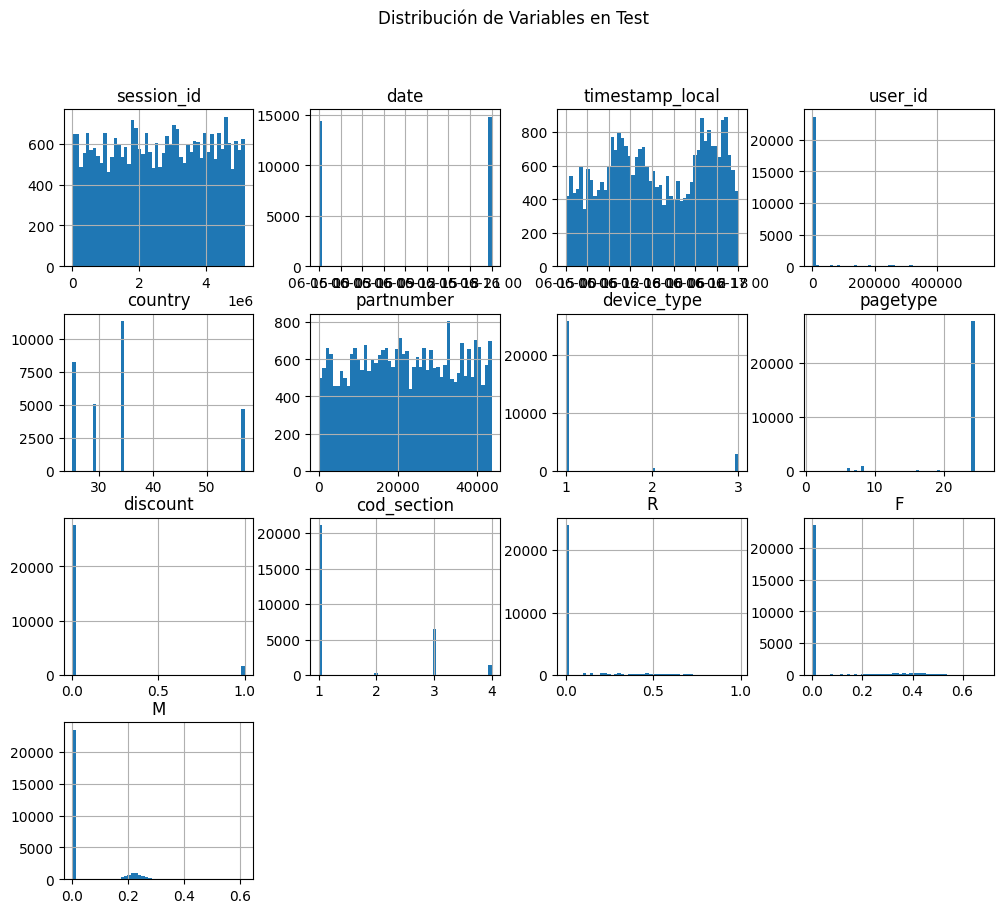

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de las variables numéricas
test_final.hist(figsize=(12, 10), bins=50)
plt.suptitle('Distribución de Variables en Test')
plt.show()

### 📊 Variables Categóricas

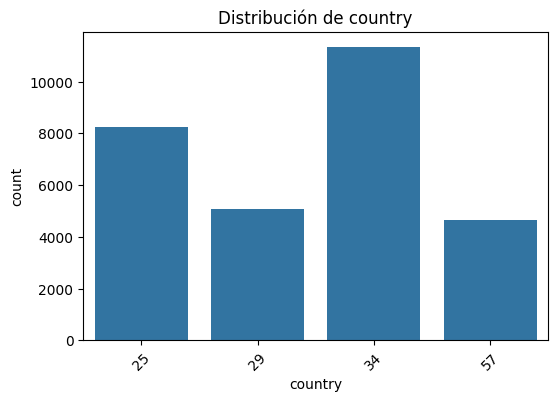

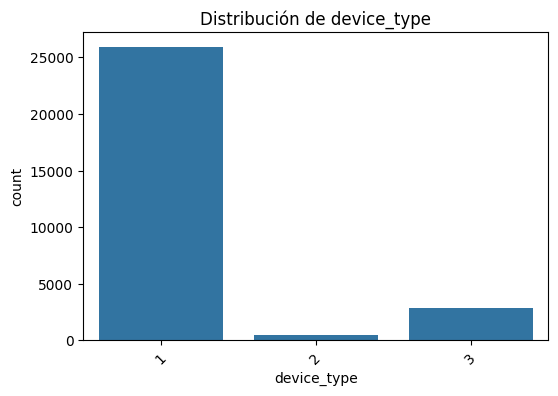

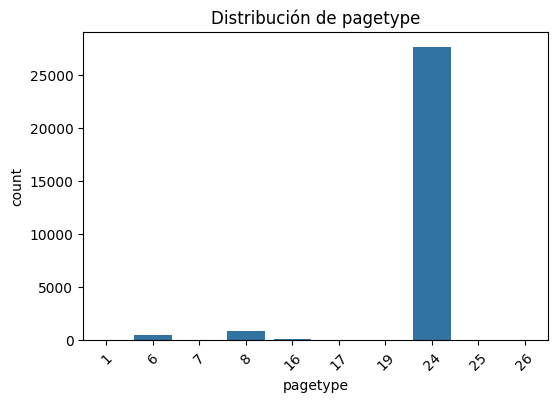

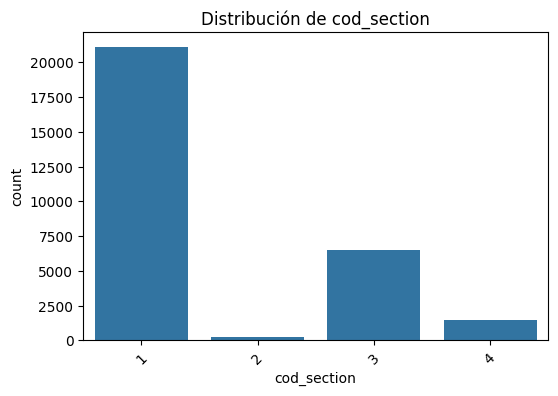

In [4]:
# Contamos valores únicos por cada variable categórica
cat_columns = ['country', 'device_type', 'pagetype', 'cod_section']
for col in cat_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=test_final)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()


### 📊 Correlaciones

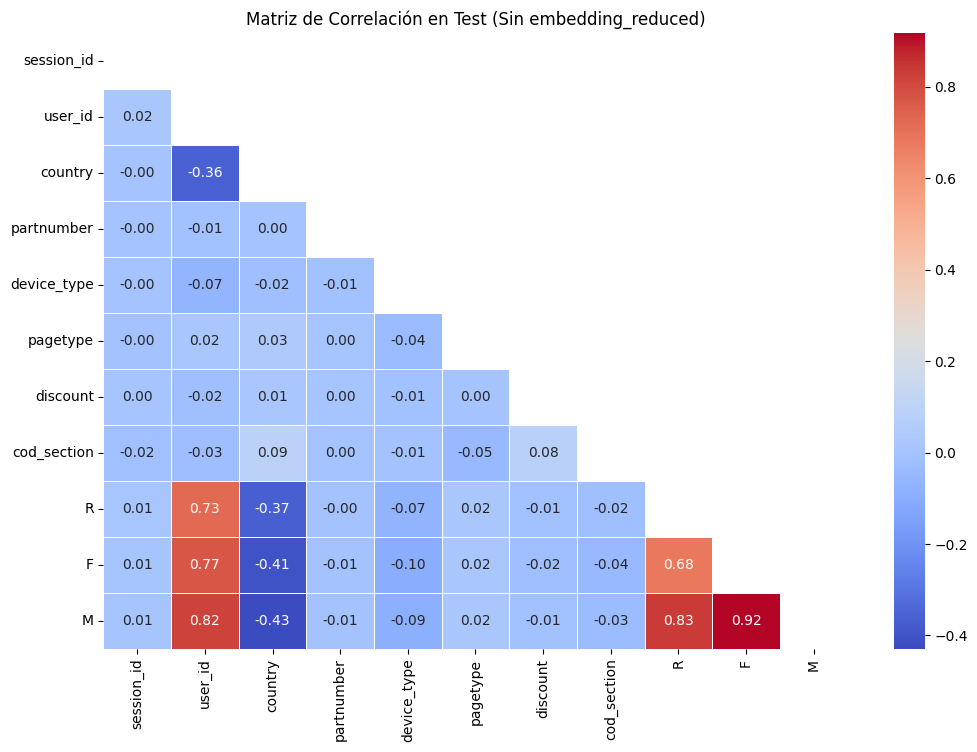

In [6]:
# Matriz de correlación para ver qué variables podrían ser irrelevantes
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir columnas no numéricas o problemáticas
corr_columns = test_final.select_dtypes(include=['int8', 'int32', 'float32', 'float64']).columns

# Matriz de correlación solo con columnas numéricas
corr_matrix = test_final[corr_columns].corr()

# Crear máscara para ocultar la parte superior del mapa
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generar el heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación en Test (Sin embedding_reduced)')
plt.show()



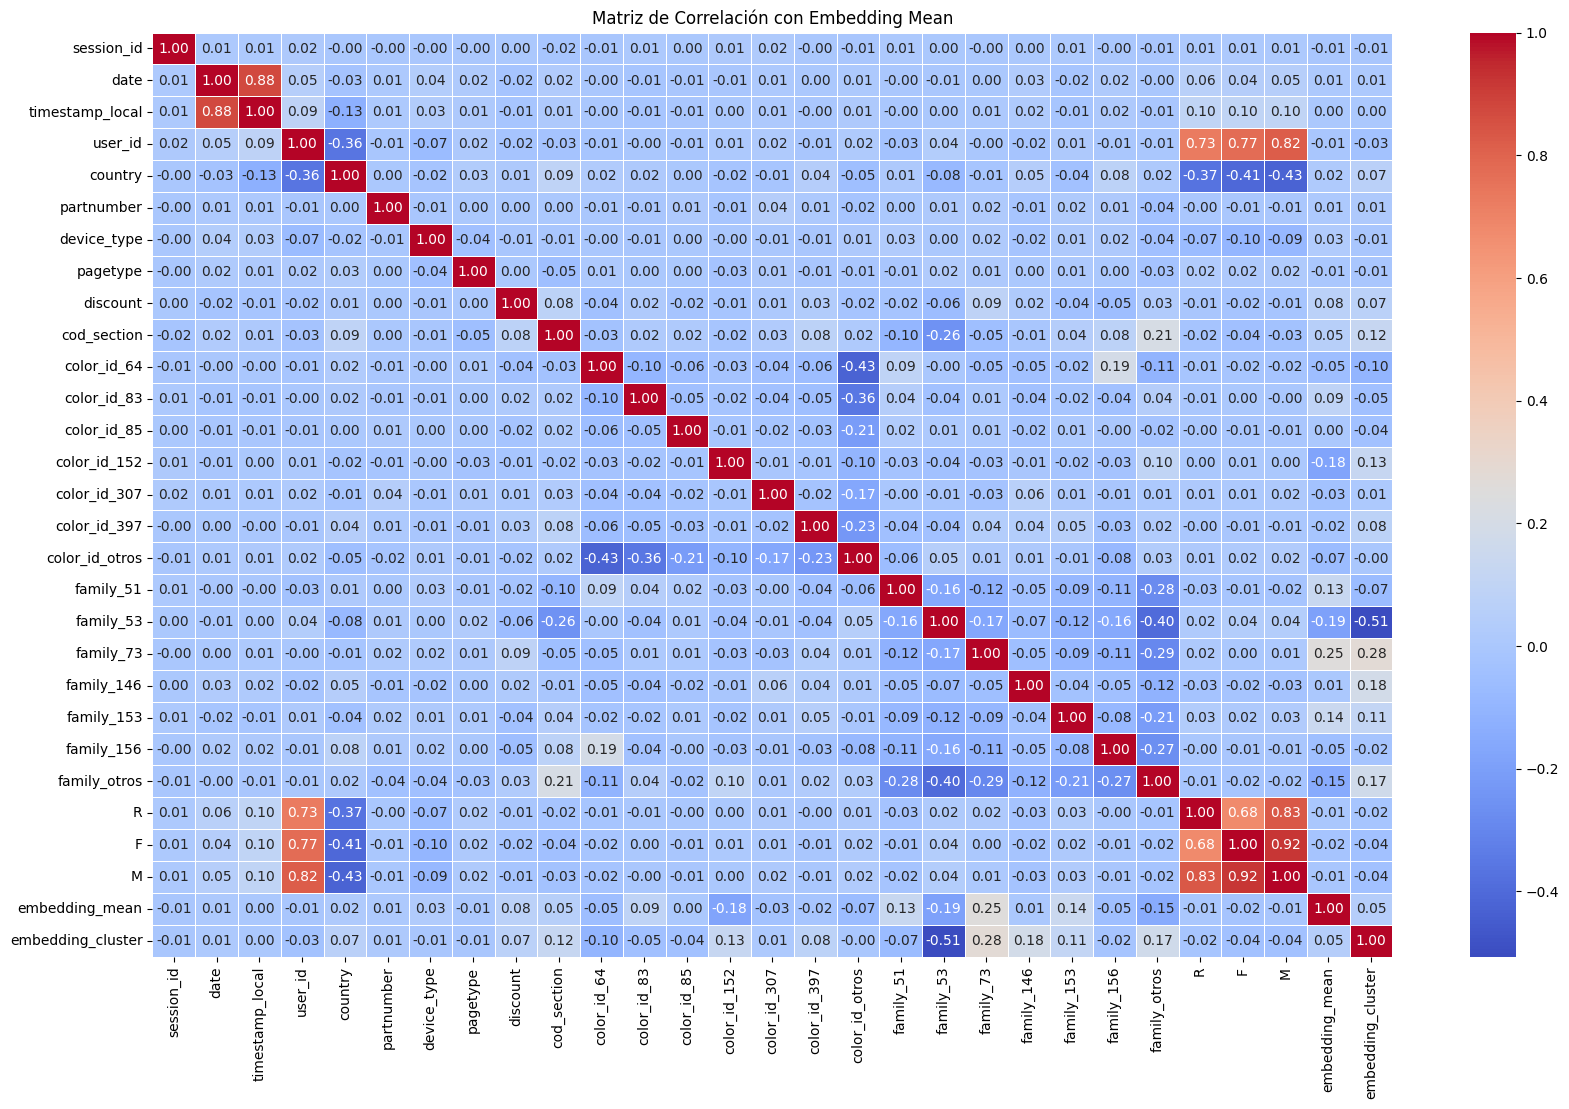

In [13]:
import numpy as np

# Convertimos embedding_reduced a un array de medias por fila
test_final['embedding_mean'] = test_final['embedding_reduced'].apply(lambda x: np.mean(x) if isinstance(x, np.ndarray) else 0)

# Ver correlación con otras variables
corr_matrix = test_final.drop(columns=['embedding_reduced']).corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación con Embedding Mean')
plt.show()


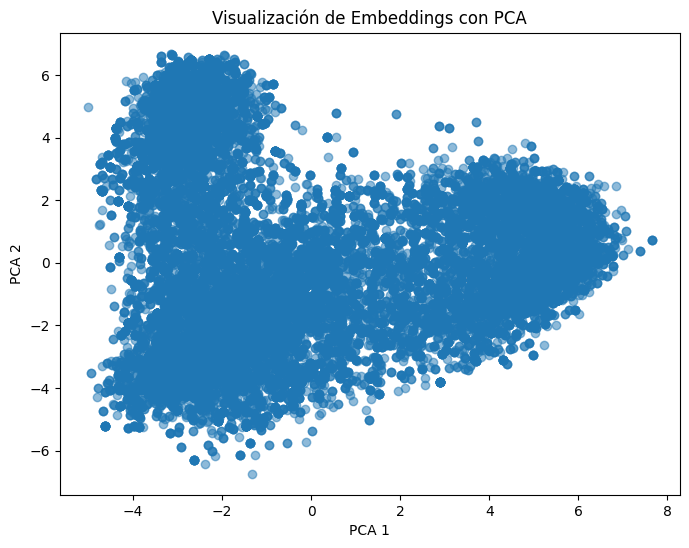

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(np.stack(test_final['embedding_reduced'].values))

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], alpha=0.5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualización de Embeddings con PCA")
plt.show()


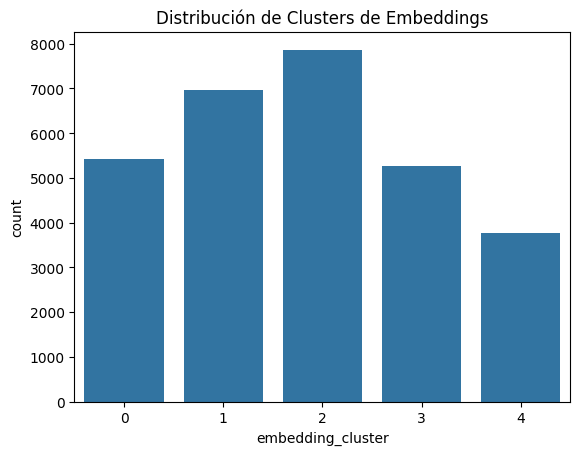

In [9]:
from sklearn.cluster import KMeans

# Aplicar KMeans con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
test_final['embedding_cluster'] = kmeans.fit_predict(np.stack(test_final['embedding_reduced'].values))

# Ver la distribución de clusters
sns.countplot(x='embedding_cluster', data=test_final)
plt.title("Distribución de Clusters de Embeddings")
plt.show()


### Análisis de las gráficas calculadas

#### **📊 1️⃣ Distribuciones de Variables**
Las distribuciones revelan **sesgos y patrones importantes** que debemos considerar:

##### ✅ **Variables con distribuciones desbalanceadas**
- **`device_type`** → Gran mayoría de usuarios usan el tipo **1**.
- **`pagetype`** → Mayoría absoluta en la categoría **24**, las demás son casi inexistentes.
- **`cod_section`** → La sección **1** domina completamente.
- **`discount`** → La mayoría de los productos **no tienen descuento (0)**.

📌 **Conclusión**:  
- Variables como `pagetype` y `device_type` tienen poca variabilidad → Podrían ser descartadas o transformadas.  
- `cod_section` está muy concentrada en una sola categoría → Podríamos reagruparlas.  
- `discount` tiene muy pocos valores en 1, por lo que podría no ser muy útil.ç

#### **📉 2️⃣ Correlaciones entre Variables**
La matriz de correlación muestra algunos patrones interesantes:

##### 🔥 **Correlaciones fuertes**:
- **`R`, `F` y `M` están fuertemente correlacionadas (0.68 - 0.92)** → Esto es **esperado** en el modelo RFM (Recency, Frequency, Monetary).
- **`user_id` está correlacionado con `R`, `F` y `M`** → Indica que ciertos usuarios tienen hábitos de compra más predecibles.
- **`country` muestra una correlación negativa con `R`, `F` y `M`** → Diferencias de comportamiento entre países.

📌 **Conclusión**:  
- Podemos considerar **reducir `R`, `F`, `M` en una sola métrica**, ya que están fuertemente correlacionadas.
- `country` podría segmentar a los usuarios según su comportamiento de compra.


#### **🧠 3️⃣ Embeddings de Productos**
Hemos probado tres estrategias para entender los embeddings:

##### 📌 **Opción 1: `embedding_mean` (media de valores del embedding)**
- No tiene una correlación significativa con otras variables.
- **Posible eliminación**, ya que no aporta información clara.

##### 📌 **Opción 2: `embedding_cluster` (K-Means con 5 clusters)**
- **Los clusters están bastante equilibrados**, lo que sugiere que **hay patrones en los embeddings**.
- Puede ser **una buena característica para el modelo**, pues agrupa productos similares.

##### 📌 **Opción 3: PCA para visualización**
- La distribución **muestra agrupaciones claras**.
- Confirma que los embeddings contienen **información útil**, pero **no es interpretable directamente**.

📌 **Conclusión**:  
- **Mantener `embedding_cluster`** como una característica categórica en el modelo.  
- **Descartar `embedding_mean`** si no muestra valor predictivo.


#### **🚀 4️⃣ Recomendaciones para la Preparación Final**
🔹 **Eliminar variables con baja variabilidad**:
   - `device_type` y `pagetype` → Si queremos simplificar el modelo.  
   - `discount` → Si su impacto es mínimo.  

🔹 **Agrupar y transformar variables**:
   - `cod_section` → Reagrupar en menos categorías.  
   - `R`, `F`, `M` → Posible reducción a una única métrica.  

🔹 **Usar `embedding_cluster` como nueva característica**:
   - Añadirlo al modelo en lugar de `embedding_reduced`.

🔹 **Verificar la importancia de `country` en los modelos**:
   - Si tiene impacto, podríamos hacer modelos diferenciados por país.


## Analizamos `train_final`

In [7]:
# Cargamos datasets finales
import pandas as pd

# Cargar los datasets finales procesados
# train_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final.parquet')
test_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final.parquet')

# Verificar estructura
# print(train_final.info())
print(test_final.info())

# Revisar primeras filas
# print(train_final.head())
print(test_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   session_id         29275 non-null  int32         
 1   date               29275 non-null  datetime64[ns]
 2   timestamp_local    29275 non-null  datetime64[ns]
 3   user_id            29275 non-null  int32         
 4   country            29275 non-null  int8          
 5   partnumber         29275 non-null  int32         
 6   device_type        29275 non-null  int8          
 7   pagetype           29275 non-null  int8          
 8   discount           29275 non-null  int8          
 9   cod_section        29275 non-null  int8          
 10  embedding_reduced  29275 non-null  object        
 11  color_id_64        29275 non-null  bool          
 12  color_id_83        29275 non-null  bool          
 13  color_id_85        29275 non-null  bool          
 14  color_

### Plan de acción

#### **🛠️ Paso 1: Entender las Distribuciones**
- **Visualización de distribuciones:** Repetiremos lo que hicimos en `test`, visualizando todas las columnas relevantes, con especial atención a:
  - **Distribuciones de variables categóricas** (`country`, `device_type`, `pagetype`, etc.).
  - **Distribuciones de variables continuas** (`R`, `F`, `M`, `embedding_mean` si lo hemos añadido).
  - **Distribución de `add_to_cart`**, para observar el balance de clases.

🔍 **Objetivo:** Identificar valores atípicos, variables dominadas por una categoría, o patrones que puedan influir en `add_to_cart`.


#### **🛠️ Paso 2: Correlaciones**
- **Matriz de correlación (Pearson, Spearman, etc.)**:
  - Analizar las correlaciones de las variables numéricas con `add_to_cart`.
  - Ver si variables como `R`, `F`, y `M` tienen relaciones lineales o no.

🔍 **Objetivo:** Detectar variables con poca correlación que quizás no aporten valor.


#### **🛠️ Paso 3: Pruebas de Impacto**
- **Pruebas estadísticas en categóricas:**
  - **Chi-cuadrado** para evaluar si hay una relación significativa entre las variables categóricas (`country`, `device_type`, etc.) y `add_to_cart`.

- **Pruebas de diferencias en continuas:**
  - Usaremos **tests t-Student o U de Mann-Whitney** para comparar los valores medios de las variables continuas según `add_to_cart`.

🔍 **Objetivo:** Descubrir qué variables categóricas y continuas impactan más en `add_to_cart`.


#### **🛠️ Paso 4: Visualización Relacional**
- Graficaremos relaciones clave entre variables y `add_to_cart`:
  - **Boxplots para continuas (R, F, M).**
  - **Barplots o heatmaps para categóricas.**

🔍 **Objetivo:** Visualizar patrones claros de cómo `add_to_cart` se relaciona con las demás variables.

#### **⚡ Beneficios de este análisis:**
- **Reducir ruido:** Identificar variables irrelevantes para eliminarlas.
- **Optimizar modelos:** Seleccionar las variables más informativas.
- **Comprender el comportamiento:** Observar qué influye más en `add_to_cart`.


### Distribuciones

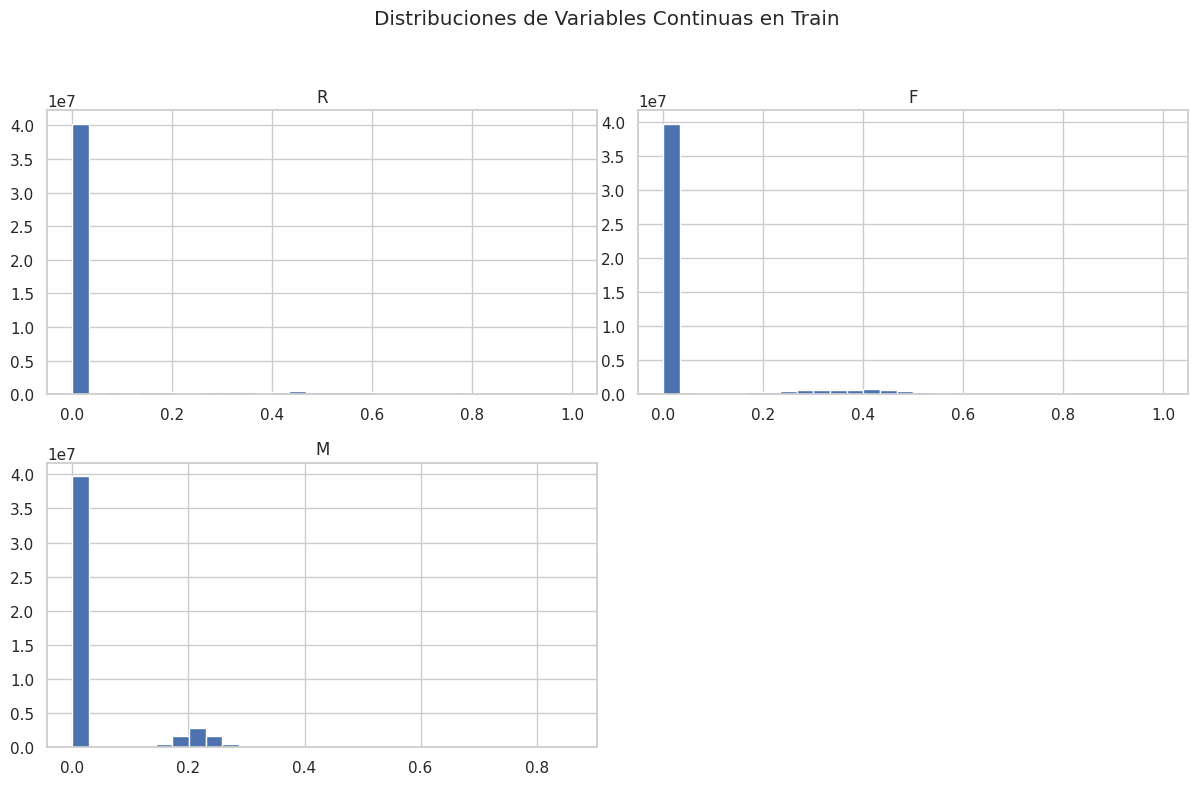

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración inicial para gráficos
sns.set(style="whitegrid")

# 1. Visualización de continuas
variables_continuas = ["R", "F", "M"]
train_final[variables_continuas].hist(bins=30, figsize=(12, 8), layout=(2, 2))
plt.suptitle("Distribuciones de Variables Continuas en Train")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


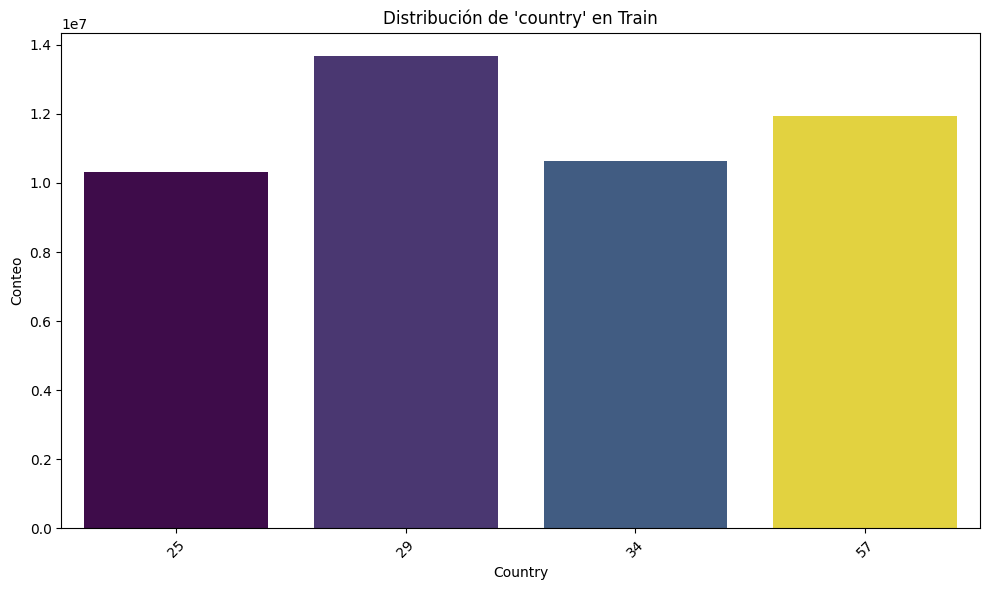

In [2]:
# 2. Visualización de categóricas importantes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=train_final, x="country", palette="viridis", hue="country", legend=False)
plt.title("Distribución de 'country' en Train")
plt.xlabel("Country")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

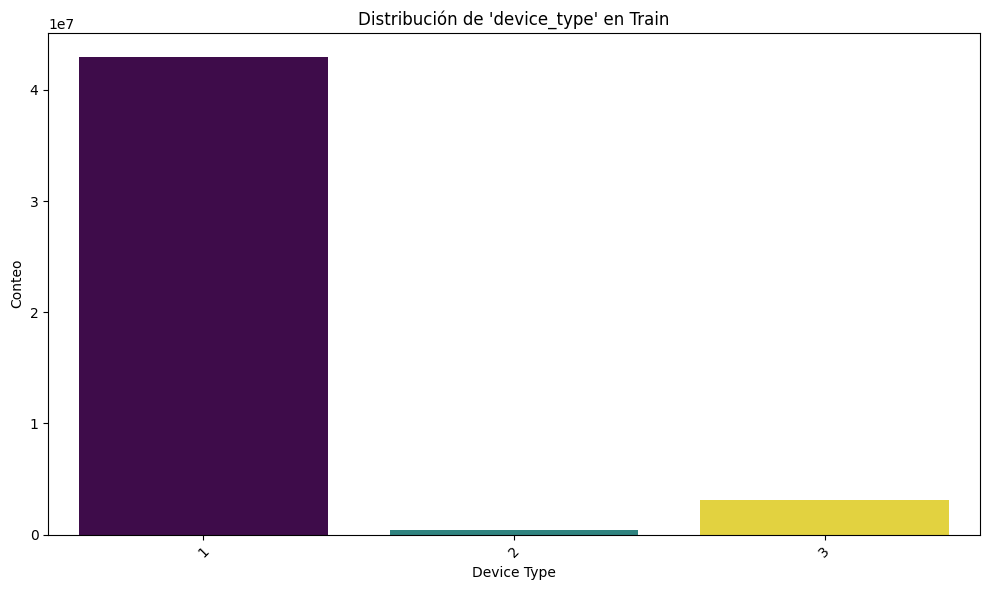

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_final, x="device_type", palette="viridis", hue="device_type", legend=False)
plt.title("Distribución de 'device_type' en Train")
plt.xlabel("Device Type")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

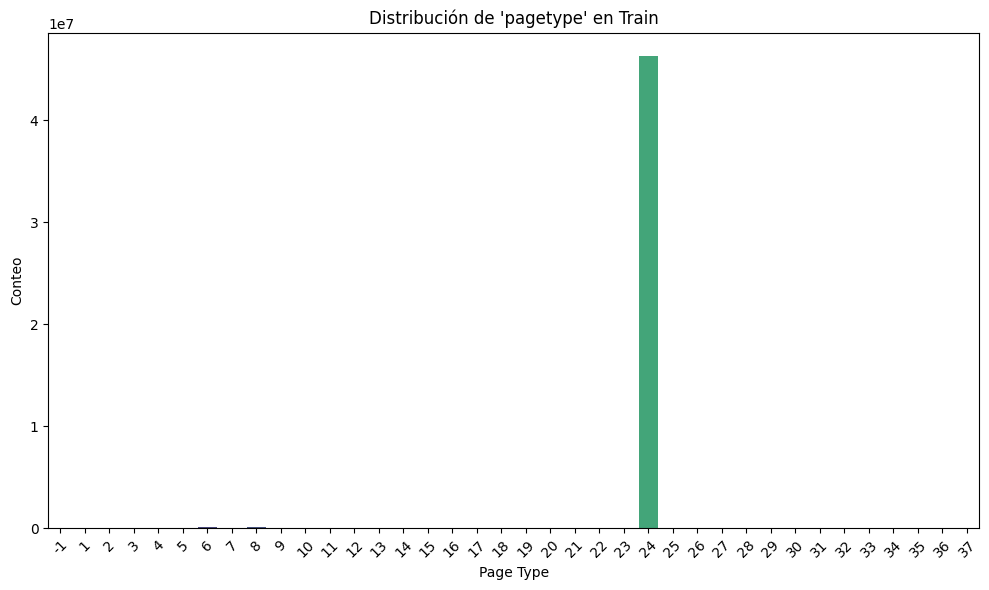

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_final, x="pagetype", palette="viridis", hue="pagetype", legend=False)
plt.title("Distribución de 'pagetype' en Train")
plt.xlabel("Page Type")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

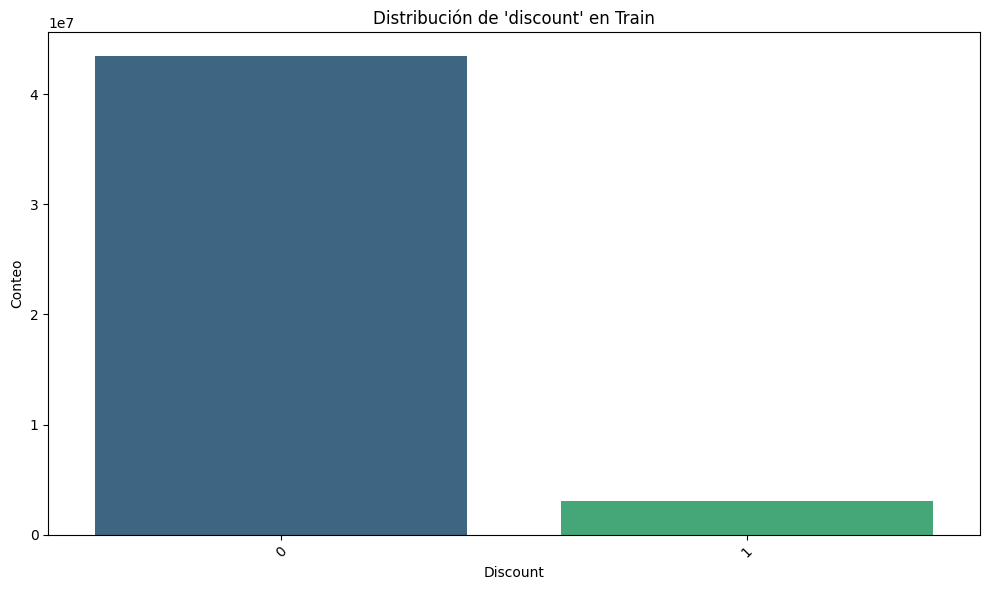

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_final, x="discount", palette="viridis", hue="discount", legend=False)
plt.title("Distribución de 'discount' en Train")
plt.xlabel("Discount")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

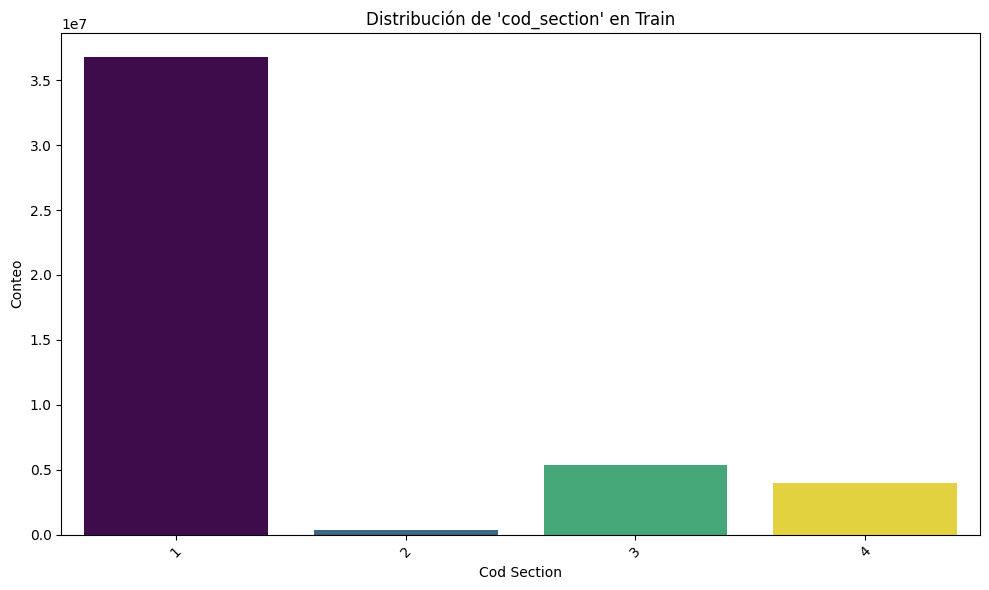

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_final, x="cod_section", palette="viridis", hue="cod_section", legend=False)
plt.title("Distribución de 'cod_section' en Train")
plt.xlabel("Cod Section")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_169936/3002256062.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_final, x="add_to_cart", palette="coolwarm")


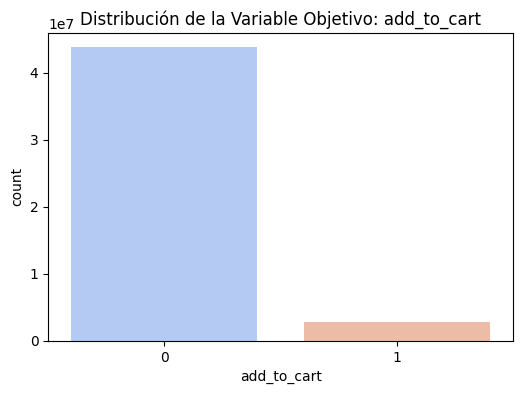

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 3. Distribución de la variable objetivo `add_to_cart`
plt.figure(figsize=(6, 4))
sns.countplot(data=train_final, x="add_to_cart", palette="coolwarm")
plt.title("Distribución de la Variable Objetivo: add_to_cart")
plt.show()

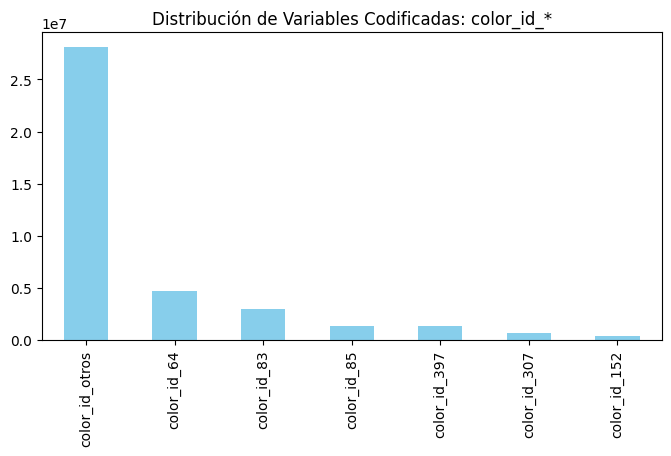

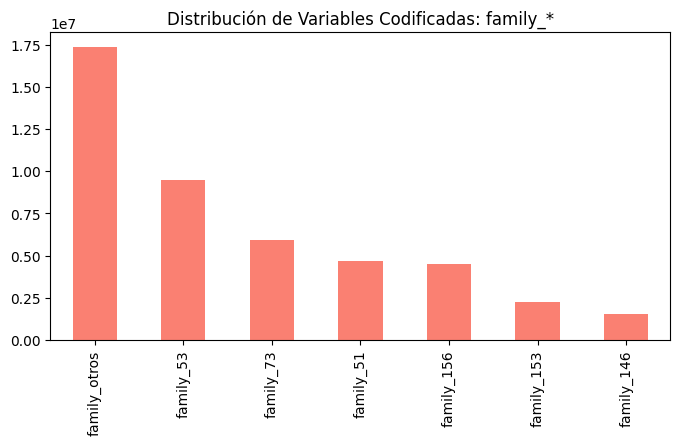

In [4]:
# 4. Visualización de variables codificadas (One-Hot Encoding)
encoded_cols_color = [col for col in train_final.columns if col.startswith("color_id_")]
encoded_cols_family = [col for col in train_final.columns if col.startswith("family_")]

# Sumar las ocurrencias en cada columna codificada
color_sums = train_final[encoded_cols_color].sum().sort_values(ascending=False)
family_sums = train_final[encoded_cols_family].sum().sort_values(ascending=False)

# Color
plt.figure(figsize=(8, 4))
color_sums.plot(kind="bar", color="skyblue")
plt.title("Distribución de Variables Codificadas: color_id_*")
plt.show()

# Family
plt.figure(figsize=(8, 4))
family_sums.plot(kind="bar", color="salmon")
plt.title("Distribución de Variables Codificadas: family_*")
plt.show()

### Correlaciones

#### Correlación de Variables Numéricas

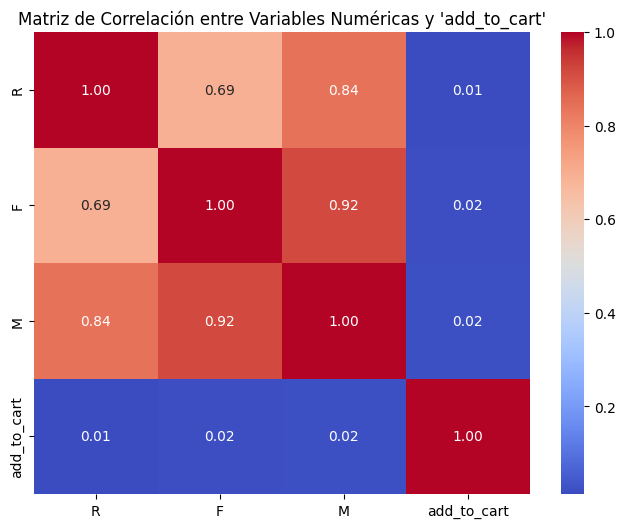

In [7]:
# Seleccionamos solo las variables continuas y la variable objetivo
numerical_columns = ['R', 'F', 'M', 'add_to_cart']
correlation_matrix = train_final[numerical_columns].corr()

# Mostramos la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas y 'add_to_cart'")
plt.show()


#### Relación entre Variables Categóricas y add_to_cart

In [8]:
for col in ['device_type', 'pagetype', 'cod_section', 'discount']:
    print(f"Relación entre {col} y add_to_cart:")
    display(train_final.groupby(col)['add_to_cart'].mean())


Relación entre device_type y add_to_cart:


device_type
1    0.056601
2    0.071085
3    0.089953
Name: add_to_cart, dtype: float64

Relación entre pagetype y add_to_cart:


pagetype
-1     1.000000
 1     0.872673
 2     1.000000
 3     1.000000
 4     1.000000
 5     1.000000
 6     1.000000
 7     1.000000
 8     1.000000
 9     1.000000
 10    1.000000
 11    1.000000
 12    1.000000
 13    1.000000
 14    1.000000
 15    1.000000
 16    1.000000
 17    1.000000
 18    1.000000
 19    1.000000
 20    1.000000
 21    1.000000
 22    1.000000
 23    1.000000
 24    0.052990
 25    1.000000
 26    1.000000
 27    1.000000
 28    1.000000
 29    1.000000
 30    1.000000
 31    1.000000
 32    1.000000
 33    1.000000
 34    1.000000
 35    1.000000
 36    1.000000
 37    1.000000
Name: add_to_cart, dtype: float64

Relación entre cod_section y add_to_cart:


cod_section
1    0.053947
2    0.045234
3    0.104119
4    0.045798
Name: add_to_cart, dtype: float64

Relación entre discount y add_to_cart:


discount
0    0.058845
1    0.060945
Name: add_to_cart, dtype: float64

/tmp/ipykernel_19015/1722218333.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


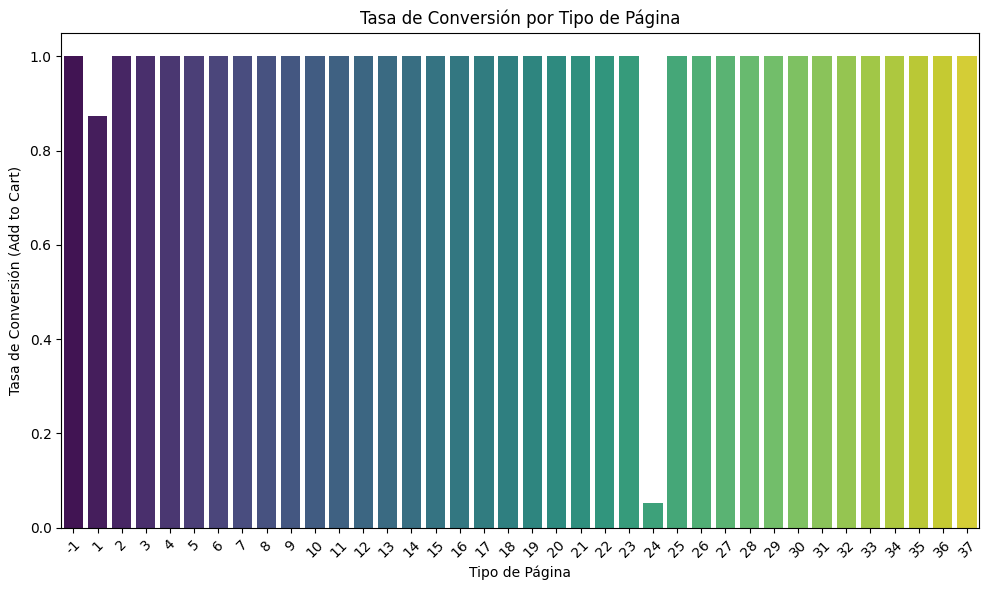

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=train_final,
    x='pagetype',
    y='add_to_cart',
    errorbar=None,
    palette='viridis'
)
plt.title("Tasa de Conversión por Tipo de Página")
plt.xlabel("Tipo de Página")
plt.ylabel("Tasa de Conversión (Add to Cart)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_24153/2173870648.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


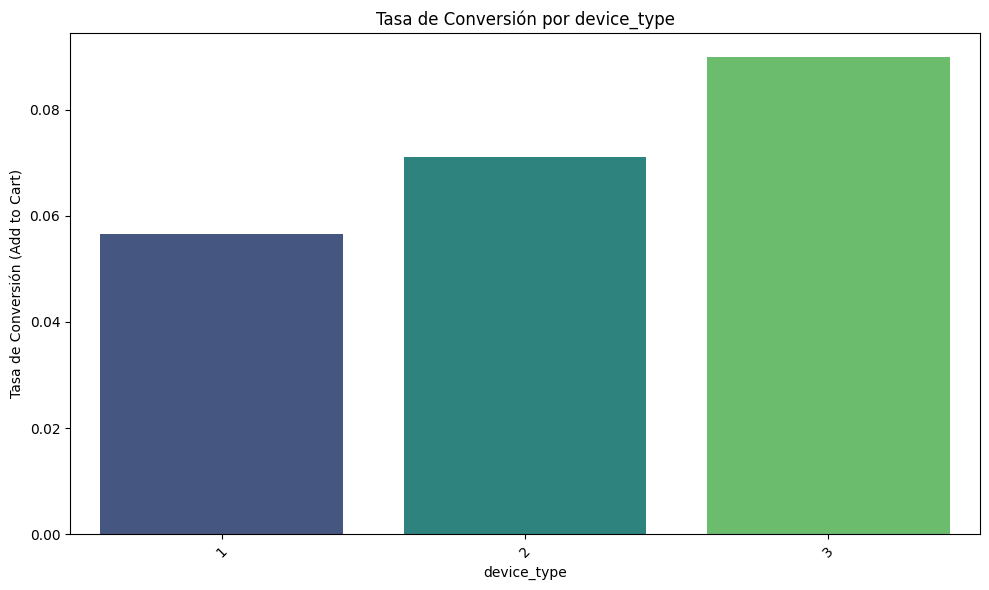

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(
    data=train_final, 
    x='device_type', 
    y='add_to_cart', 
    errorbar=None, 
    palette='viridis')
plt.title("Tasa de Conversión por device_type")
plt.xlabel("device_type")
plt.ylabel("Tasa de Conversión (Add to Cart)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_16084/1629218962.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_final, x='cod_section', y='add_to_cart', errorbar=None, palette='viridis')


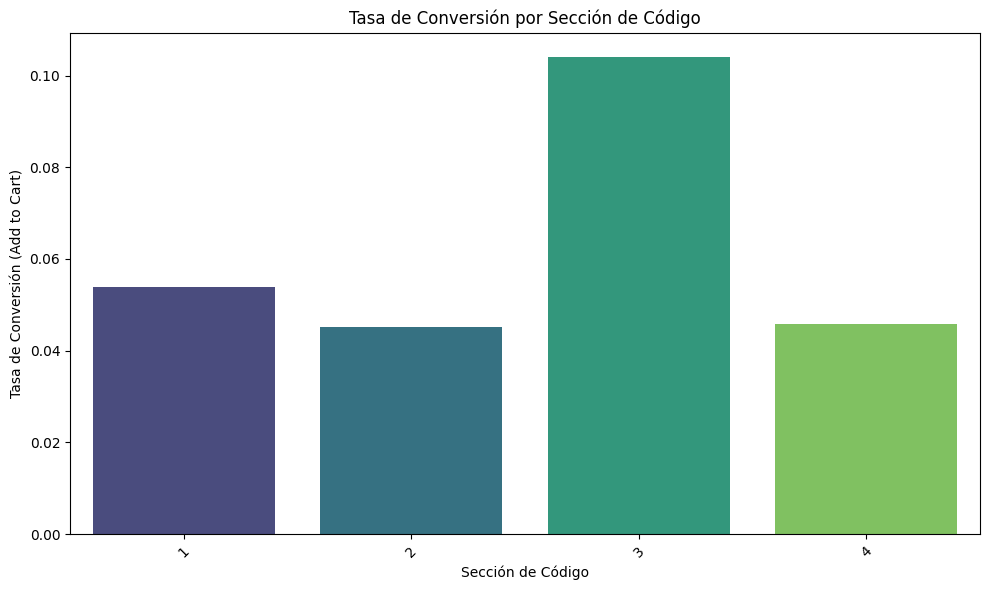

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=train_final, x='cod_section', y='add_to_cart', errorbar=None, palette='viridis')
plt.title("Tasa de Conversión por Sección de Código")
plt.xlabel("Sección de Código")
plt.ylabel("Tasa de Conversión (Add to Cart)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_16084/2169344223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_final, x='discount', y='add_to_cart', errorbar=None, palette='viridis')


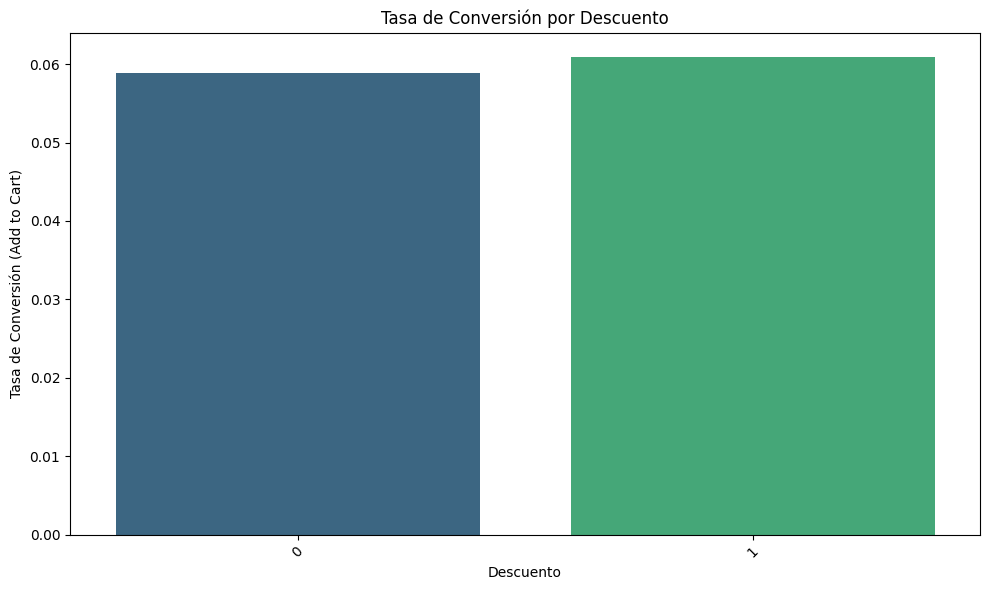

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=train_final, x='discount', y='add_to_cart', errorbar=None, palette='viridis')
plt.title("Tasa de Conversión por Descuento")
plt.xlabel("Descuento")
plt.ylabel("Tasa de Conversión (Add to Cart)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Decisiones sobre variables

- Eliminar la variable 'discount'

In [8]:
# Eliminar la variable 'discount'
# train_final = train_final.drop(columns=['discount'], errors='ignore')
test_final = test_final.drop(columns=['discount'], errors='ignore')

print("Variable 'discount' eliminada correctamente.")

Variable 'discount' eliminada correctamente.


- Guardar los datasets después de eliminar 'discount'

In [9]:
# Guardar los datasets después de eliminar 'discount'
# train_final.to_parquet("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_cleaned.parquet", index=False)
test_final.to_parquet("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_cleaned.parquet", index=False)

print("Datasets guardados correctamente:")
# print(" - train_final_cleaned.parquet")
print(" - test_final_cleaned.parquet")


Datasets guardados correctamente:
 - test_final_cleaned.parquet


- Revisar la distribución de pagetype

In [7]:
# Calcular la distribución de pagetype
pagetype_distribution = train_final['pagetype'].value_counts(normalize=True) * 100
print("Distribución de pagetype (%):")
print(pagetype_distribution)

# Separar pagetype 24 y las categorías menos comunes
pagetype_others = pagetype_distribution[pagetype_distribution < 5]
pagetype_24 = pagetype_distribution[pagetype_distribution.index == 24]

print("\nCategorías menos comunes (menos del 5%):")
print(pagetype_others)
print("\npagetype 24 representa:")
print(pagetype_24)


Distribución de pagetype (%):
pagetype
 24    99.366033
 8      0.278488
 6      0.243797
 19     0.041962
 16     0.032994
 7      0.017097
 1      0.007845
 17     0.004876
-1      0.002571
 25     0.000896
 23     0.000634
 20     0.000601
 10     0.000507
 3      0.000412
 5      0.000354
 21     0.000294
 12     0.000135
 13     0.000116
 26     0.000105
 14     0.000071
 9      0.000060
 11     0.000058
 22     0.000028
 15     0.000021
 2      0.000011
 34     0.000004
 31     0.000004
 30     0.000002
 18     0.000002
 4      0.000002
 32     0.000002
 29     0.000002
 37     0.000002
 27     0.000002
 33     0.000002
 35     0.000002
 36     0.000002
 28     0.000002
Name: proportion, dtype: float64

Categorías menos comunes (menos del 5%):
pagetype
 8     0.278488
 6     0.243797
 19    0.041962
 16    0.032994
 7     0.017097
 1     0.007845
 17    0.004876
-1     0.002571
 25    0.000896
 23    0.000634
 20    0.000601
 10    0.000507
 3     0.000412
 5     0.000354
 21    

- Relación entre pagetype y otras variables (add_to_cart y RFM)

In [8]:
# Tasa de conversión por pagetype
conversion_by_pagetype = train_final.groupby('pagetype')['add_to_cart'].mean().sort_values(ascending=False)
print("\nTasa de conversión (add_to_cart) por pagetype:")
print(conversion_by_pagetype)



Tasa de conversión (add_to_cart) por pagetype:
pagetype
-1     1.000000
 18    1.000000
 21    1.000000
 22    1.000000
 23    1.000000
 25    1.000000
 26    1.000000
 27    1.000000
 28    1.000000
 29    1.000000
 30    1.000000
 31    1.000000
 32    1.000000
 33    1.000000
 34    1.000000
 35    1.000000
 36    1.000000
 20    1.000000
 19    1.000000
 10    1.000000
 9     1.000000
 2     1.000000
 3     1.000000
 4     1.000000
 5     1.000000
 6     1.000000
 7     1.000000
 8     1.000000
 37    1.000000
 17    1.000000
 11    1.000000
 12    1.000000
 13    1.000000
 14    1.000000
 15    1.000000
 16    1.000000
 1     0.872673
 24    0.052990
Name: add_to_cart, dtype: float64


- Analizamos los valores promedio de RFM para cada pagetype:


In [9]:
# Promedio de RFM por pagetype
rfm_by_pagetype = train_final.groupby('pagetype')[['R', 'F', 'M']].mean()
print("\nPromedio de R, F, M por pagetype:")
print(rfm_by_pagetype)



Promedio de R, F, M por pagetype:
                 R         F         M
pagetype                              
-1        0.228508  0.215510  0.130804
 1        0.065175  0.042211  0.030471
 2        0.000000  0.000000  0.000000
 3        0.090070  0.168305  0.075818
 4        0.000000  0.000000  0.000000
 5        0.128812  0.104357  0.069662
 6        0.080246  0.099139  0.051925
 7        0.032744  0.017295  0.014310
 8        0.040881  0.028814  0.020576
 9        0.038143  0.023878  0.015553
 10       0.135867  0.191063  0.104712
 11       0.182371  0.090039  0.087191
 12       0.198252  0.063562  0.062700
 13       0.225873  0.235329  0.129470
 14       0.082354  0.185418  0.068271
 15       0.147329  0.127035  0.073052
 16       0.048611  0.033954  0.024263
 17       0.147916  0.126555  0.080329
 18       0.000000  0.000000  0.000000
 19       0.047261  0.046915  0.028189
 20       0.050196  0.011689  0.012928
 21       0.121033  0.086496  0.057788
 22       0.321446  0.297642 

In [10]:
# Crear una nueva columna agrupada
train_final['pagetype_group'] = train_final['pagetype'].apply(lambda x: 'General' if x == 24 else 'Específico')

# Validar la nueva agrupación con add_to_cart
conversion_by_group = train_final.groupby('pagetype_group')['add_to_cart'].mean()
print("\nTasa de conversión por grupo (pagetype_group):")
print(conversion_by_group)



Tasa de conversión por grupo (pagetype_group):
pagetype_group
Específico    0.998424
General       0.052990
Name: add_to_cart, dtype: float64


- Agrupar pagetype en dos grupos:
    - General: pagetype=24.
    - Específico: Todos los demás pagetype.

In [ ]:
# Crear nueva columna 'pagetype_group'
train_final['pagetype_group'] = train_final['pagetype'].apply(
    lambda x: 'General' if x == 24 else 'Específico'
)

# Comprobar distribución de los nuevos grupos
pagetype_group_distribution = train_final['pagetype_group'].value_counts(normalize=True) * 100
print("Distribución de 'pagetype_group' (%):")
print(pagetype_group_distribution)

# Calcular tasa de conversión para los grupos
conversion_rate_group = train_final.groupby('pagetype_group')['add_to_cart'].mean()
print("\nTasa de conversión por 'pagetype_group':")
print(conversion_rate_group)


/tmp/ipykernel_24153/2526063090.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_group.index, y=conversion_rate_group.values, palette="viridis")


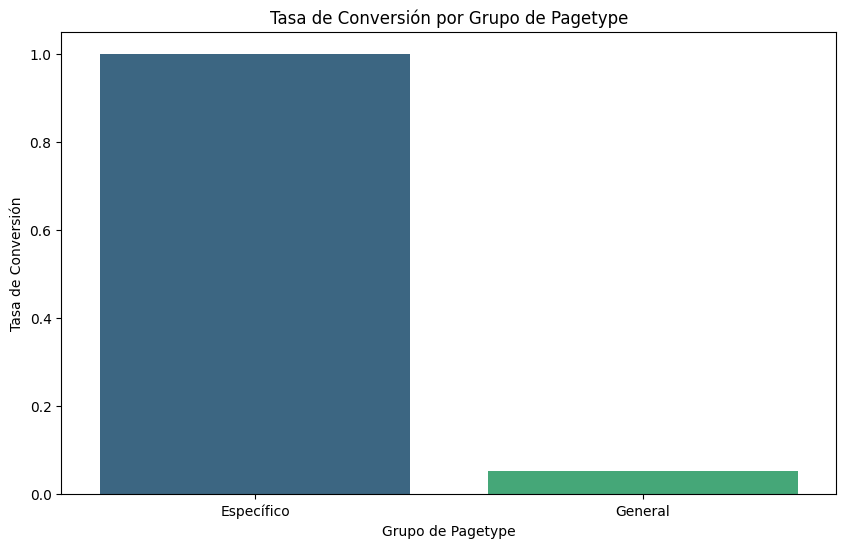

In [12]:
# Visualización rápida
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rate_group.index, y=conversion_rate_group.values, palette="viridis")
plt.title("Tasa de Conversión por Grupo de Pagetype")
plt.ylabel("Tasa de Conversión")
plt.xlabel("Grupo de Pagetype")
plt.show()

- Eliminamos la columna original 'pagetype'

In [11]:
# Crear nueva columna 'pagetype_group'
test_final['pagetype_group'] = test_final['pagetype'].apply(
    lambda x: 'General' if x == 24 else 'Específico'
)

# Comprobar distribución de los nuevos grupos
pagetype_group_distribution = test_final['pagetype_group'].value_counts(normalize=True) * 100
print("Distribución de 'pagetype_group(TEST)' (%):")
print(pagetype_group_distribution)


Distribución de 'pagetype_group(TEST)' (%):
pagetype_group
General       94.561913
Específico     5.438087
Name: proportion, dtype: float64


In [12]:
# Eliminamos la columna original 'pagetype'
# train_final.drop(columns=['pagetype'], inplace=True)
test_final.drop(columns=['pagetype'], inplace=True)

In [13]:
train_final.columns

Index(['session_id', 'date', 'timestamp_local', 'add_to_cart', 'user_id',
       'country', 'partnumber', 'device_type', 'cod_section',
       'embedding_reduced', 'color_id_64', 'color_id_83', 'color_id_85',
       'color_id_152', 'color_id_307', 'color_id_397', 'color_id_otros',
       'family_51', 'family_53', 'family_73', 'family_146', 'family_153',
       'family_156', 'family_otros', 'R', 'F', 'M', 'pagetype_group'],
      dtype='object')

- Guardamos los datasets actualizados

In [14]:
# Guardamos los datasets actualizados
# train_final.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_cleaned.parquet', index=False)
test_final.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_cleaned.parquet', index=False)

print("Columna 'pagetype' eliminada y datasets guardados.")

Columna 'pagetype' eliminada y datasets guardados.


### Validación y verficación

In [9]:
import pandas as pd

# Cargar datasets limpios guardados previamente
# train_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_cleaned.parquet')
test_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_cleaned.parquet')

# Verificar estructura y primeras filas
# print(train_final.info())
# print(train_final.head())


In [2]:
print(train_final.columns)
print(test_final.columns)
print(train_final.info())
print(test_final.info())
print(train_final.head(20))
print(test_final.head(20))

Index(['session_id', 'date', 'timestamp_local', 'add_to_cart', 'user_id',
       'country', 'partnumber', 'device_type', 'cod_section',
       'embedding_reduced', 'color_id_64', 'color_id_83', 'color_id_85',
       'color_id_152', 'color_id_307', 'color_id_397', 'color_id_otros',
       'family_51', 'family_53', 'family_73', 'family_146', 'family_153',
       'family_156', 'family_otros', 'R', 'F', 'M', 'pagetype_group'],
      dtype='object')
Index(['session_id', 'date', 'timestamp_local', 'user_id', 'country',
       'partnumber', 'device_type', 'cod_section', 'embedding_reduced',
       'color_id_64', 'color_id_83', 'color_id_85', 'color_id_152',
       'color_id_307', 'color_id_397', 'color_id_otros', 'family_51',
       'family_53', 'family_73', 'family_146', 'family_153', 'family_156',
       'family_otros', 'R', 'F', 'M', 'pagetype_group'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 28 columns):
 #

### Análisis de Variables Categóricas Restantes

/tmp/ipykernel_54596/648562728.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_final, x='device_type', palette="viridis")


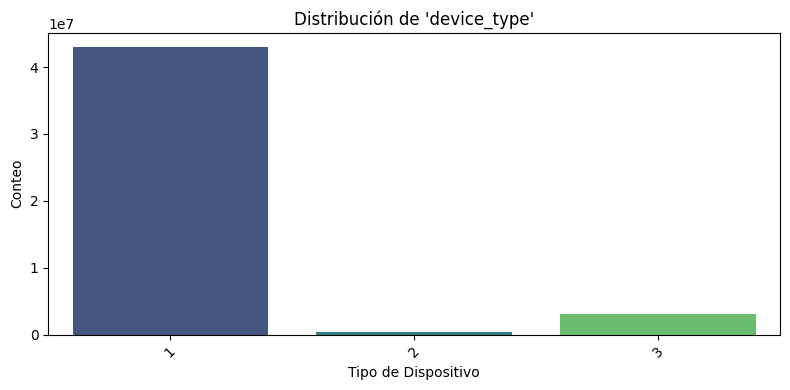

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la distribución de 'device_type'
plt.figure(figsize=(8, 4))
sns.countplot(data=train_final, x='device_type', palette="viridis")
plt.title("Distribución de 'device_type'")
plt.xlabel("Tipo de Dispositivo")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tasa de conversión para 'device_type':
 device_type
1    0.056601
2    0.071085
3    0.089953
Name: add_to_cart, dtype: float64 



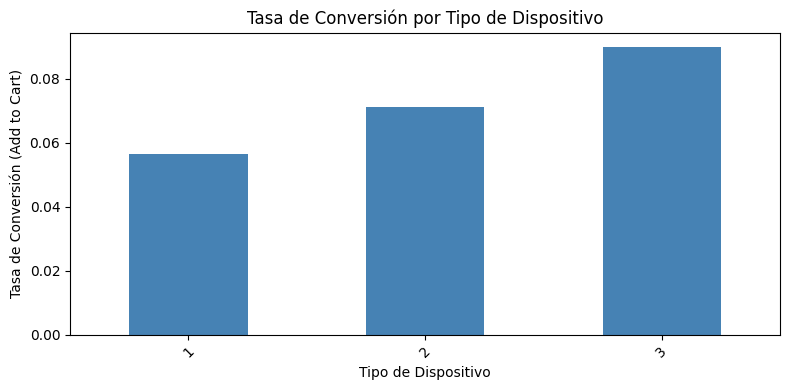

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cálculo de la tasa de conversión por 'device_type'
conversion_rate_device = train_final.groupby('device_type')['add_to_cart'].mean()
print("Tasa de conversión para 'device_type':\n", conversion_rate_device, "\n")

# Visualización de la tasa de conversión por 'device_type'
plt.figure(figsize=(8, 4))
conversion_rate_device.plot(kind='bar', color='steelblue')
plt.title("Tasa de Conversión por Tipo de Dispositivo")
plt.ylabel("Tasa de Conversión (Add to Cart)")
plt.xlabel("Tipo de Dispositivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_57334/1430773689.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_final, x='cod_section', palette="viridis")


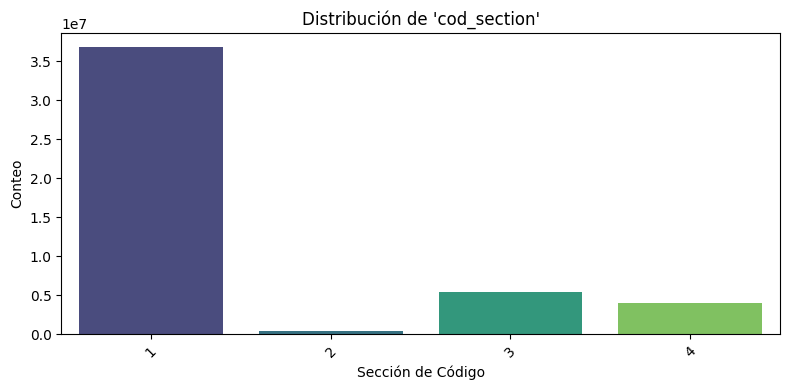

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la distribución de 'cod_section'
plt.figure(figsize=(8, 4))
sns.countplot(data=train_final, x='cod_section', palette="viridis")
plt.title("Distribución de 'cod_section'")
plt.xlabel("Sección de Código")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tasa de conversión para 'cod_section':
 cod_section
1    0.053947
2    0.045234
3    0.104119
4    0.045798
Name: add_to_cart, dtype: float64 



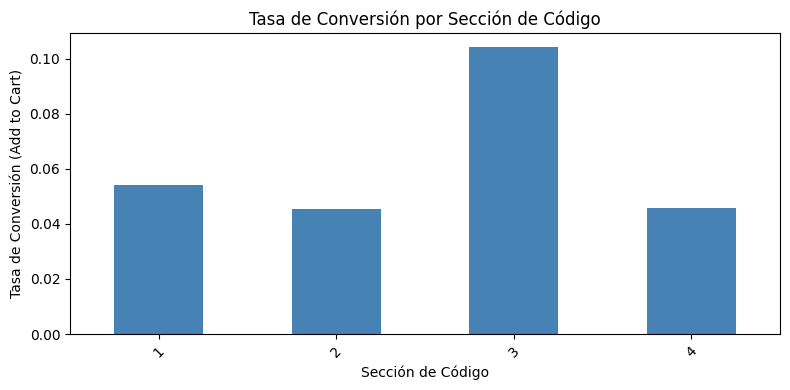

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cálculo de la tasa de conversión por 'cod_section'
conversion_rate_cod_section = train_final.groupby('cod_section')['add_to_cart'].mean()
print("Tasa de conversión para 'cod_section':\n", conversion_rate_cod_section, "\n")

# Visualización de la tasa de conversión por 'cod_section'
plt.figure(figsize=(8, 4))
conversion_rate_cod_section.plot(kind='bar', color='steelblue')
plt.title("Tasa de Conversión por Sección de Código")
plt.ylabel("Tasa de Conversión (Add to Cart)")
plt.xlabel("Sección de Código")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_57334/3341554573.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_final, x='pagetype_group', palette="viridis")


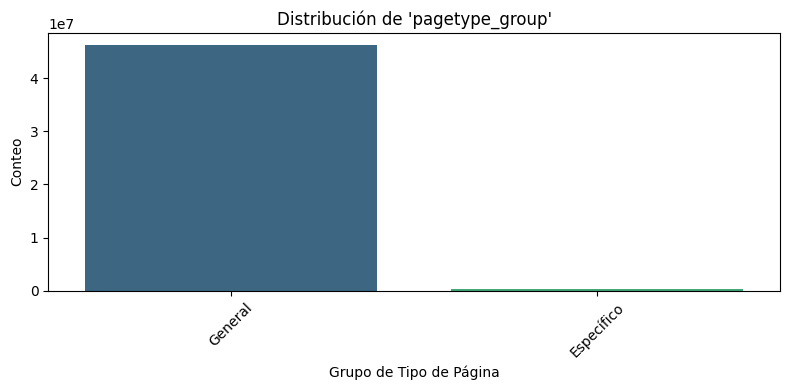

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización de la distribución de 'pagetype_group'
plt.figure(figsize=(8, 4))
sns.countplot(data=train_final, x='pagetype_group', palette="viridis")
plt.title("Distribución de 'pagetype_group'")
plt.xlabel("Grupo de Tipo de Página")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tasa de conversión para 'pagetype_group':
 pagetype_group
Específico    0.998424
General       0.052990
Name: add_to_cart, dtype: float64 



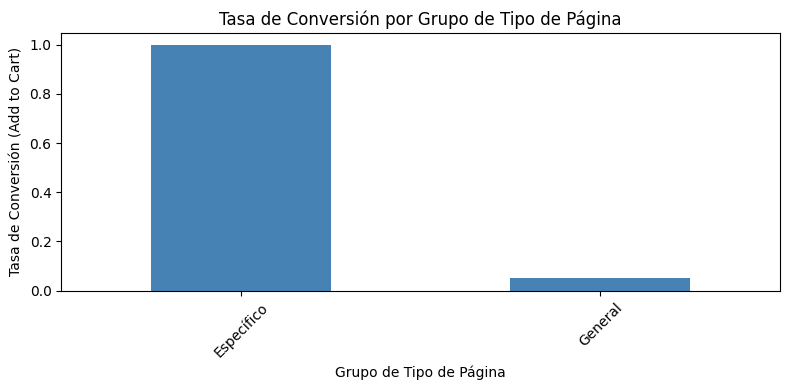

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cálculo de la tasa de conversión por 'pagetype_group'
conversion_rate_pagetype_group = train_final.groupby('pagetype_group')['add_to_cart'].mean()
print("Tasa de conversión para 'pagetype_group':\n", conversion_rate_pagetype_group, "\n")

# Visualización de la tasa de conversión por 'pagetype_group'
plt.figure(figsize=(8, 4))
conversion_rate_pagetype_group.plot(kind='bar', color='steelblue')
plt.title("Tasa de Conversión por Grupo de Tipo de Página")
plt.ylabel("Tasa de Conversión (Add to Cart)")
plt.xlabel("Grupo de Tipo de Página")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Exploración y Valoración de Reagrupación de cod_section

In [11]:
# Distribución y proporciones de cod_section en test
test_distribution = test_final['cod_section'].value_counts(normalize=True) * 100
print("Distribución de cod_section en Test (%):\n", test_distribution)


Distribución de cod_section en Test (%):
 cod_section
1    72.085397
3    22.169086
4     4.918873
2     0.826644
Name: proportion, dtype: float64


- Reagrupamos cod_section por importancia y tasa de conversión

In [12]:
# Crear nueva columna 'cod_section_group' en train y test
def cod_section_regroup(cod_section):
    if cod_section == 1:
        return 1  # Grupo 1
    elif cod_section in [2, 4]:
        return 2  # Grupo 2
    elif cod_section == 3:
        return 3  # Grupo 3

# Aplicar la función
train_final['cod_section_group'] = train_final['cod_section'].apply(cod_section_regroup)
test_final['cod_section_group'] = test_final['cod_section'].apply(cod_section_regroup)


In [13]:
# Distribuciones de los nuevos grupos
print("Distribución de 'cod_section_group' en Train (%):")
print(train_final['cod_section_group'].value_counts(normalize=True) * 100)

print("\nDistribución de 'cod_section_group' en Test (%):")
print(test_final['cod_section_group'].value_counts(normalize=True) * 100)


Distribución de 'cod_section_group' en Train (%):
cod_section_group
1    79.093495
3    11.564543
2     9.341961
Name: proportion, dtype: float64

Distribución de 'cod_section_group' en Test (%):
cod_section_group
1    72.085397
3    22.169086
2     5.745517
Name: proportion, dtype: float64


In [14]:
# Tasa de conversión por grupo en train
print("Tasa de conversión por 'cod_section_group' en Train:")
print(train_final.groupby('cod_section_group')['add_to_cart'].mean())


Tasa de conversión por 'cod_section_group' en Train:
cod_section_group
1    0.053947
2    0.045752
3    0.104119
Name: add_to_cart, dtype: float64


- Guardamos la reagrupación y eliminamos la columna

In [15]:
# Guardar train_final con la nueva columna
train_final.drop(columns=['cod_section'], inplace=True)
train_final.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_cleaned.parquet', index=False)

In [16]:
# Guardar test_final con la nueva columna
test_final.drop(columns=['cod_section'], inplace=True)
test_final.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_cleaned.parquet', index=False)

print("Datasets guardados con la nueva agrupación y sin la columna 'cod_section'.")

Datasets guardados con la nueva agrupación y sin la columna 'cod_section'.


In [18]:
print(train_final.info())
print(test_final.info())
print(train_final.head())
print(test_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 28 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   country            int8          
 6   partnumber         int32         
 7   device_type        int8          
 8   embedding_reduced  object        
 9   color_id_64        bool          
 10  color_id_83        bool          
 11  color_id_85        bool          
 12  color_id_152       bool          
 13  color_id_307       bool          
 14  color_id_397       bool          
 15  color_id_otros     bool          
 16  family_51          bool          
 17  family_53          bool          
 18  family_73          bool          
 19  family_146         bool          
 20  family_153         boo

### Normalización o Transformación de R, F, M

In [6]:
import pandas as pd

# train_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_cleaned.parquet')
test_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_cleaned.parquet')

Ya están normalizadas 

In [19]:
print(train_final[['R', 'F', 'M']].describe())
print(test_final[['R', 'F', 'M']].describe())


                  R             F             M
count  4.655144e+07  4.655144e+07  4.655144e+07
mean   5.876078e-02  5.149322e-02  3.169570e-02
std    1.657186e-01  1.326002e-01  7.746581e-02
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00
75%    0.000000e+00  0.000000e+00  0.000000e+00
max    9.999999e-01  1.000000e+00  8.618457e-01
                  R             F             M
count  29275.000000  29275.000000  29275.000000
mean       0.078930      0.068928      0.044179
std        0.188736      0.148672      0.090587
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000
max        0.985179      0.689272      0.615459


- Analizamos distribución y evaluamos si la fusionamos en una sola métrica.

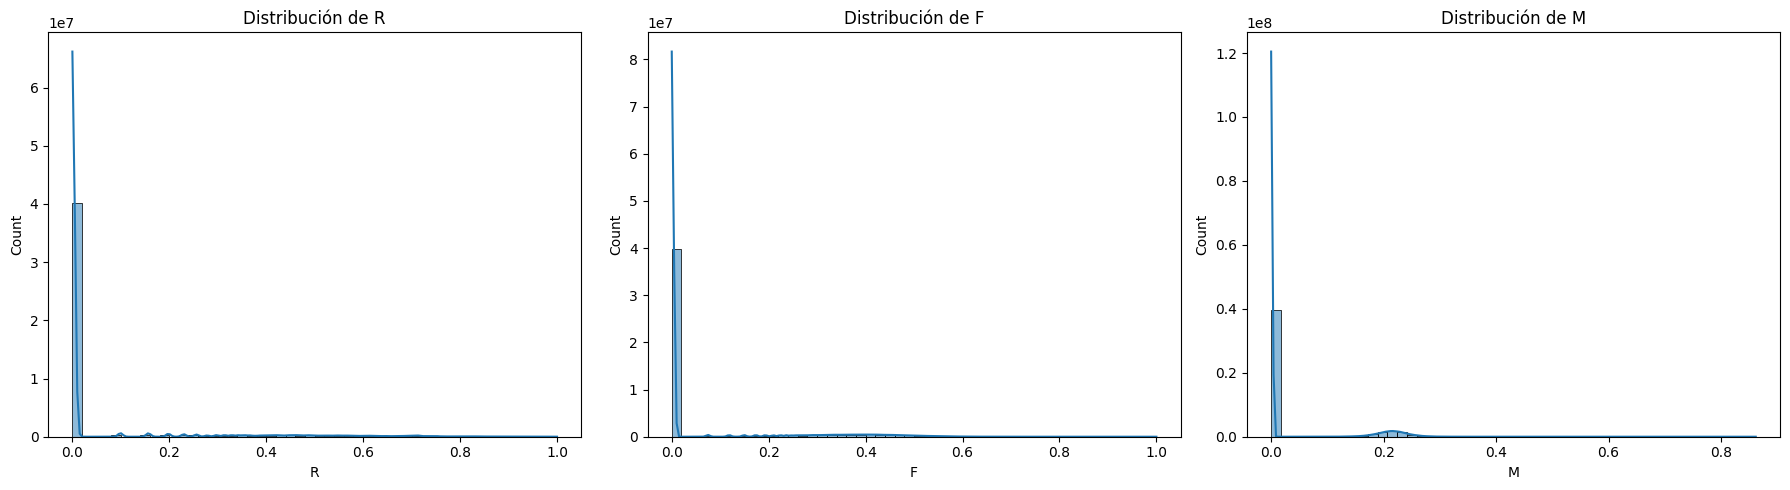

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma de cada variable
for i, col in enumerate(["R", "F", "M"]):
    sns.histplot(train_final[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()


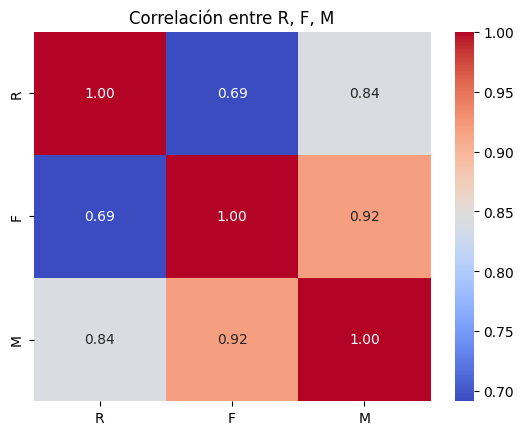

In [21]:
import numpy as np

# Matriz de correlación
corr_matrix = train_final[['R', 'F', 'M']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlación entre R, F, M")
plt.show()


In [2]:
# Fusionamos RFM con pesos arbitrarios (ajustables)
train_final["RFM_score"] = 0.4 * train_final["R"] + 0.3 * train_final["F"] + 0.3 * train_final["M"]


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar R, F, M
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(train_final[['R', 'F', 'M']])

# Aplicar PCA
pca = PCA(n_components=1)
train_final["RFM_PCA"] = pca.fit_transform(rfm_scaled)


In [4]:
from sklearn.cluster import KMeans

# Aplicamos clustering para segmentar usuarios
kmeans = KMeans(n_clusters=5, random_state=42)
train_final["RFM_cluster"] = kmeans.fit_predict(rfm_scaled)


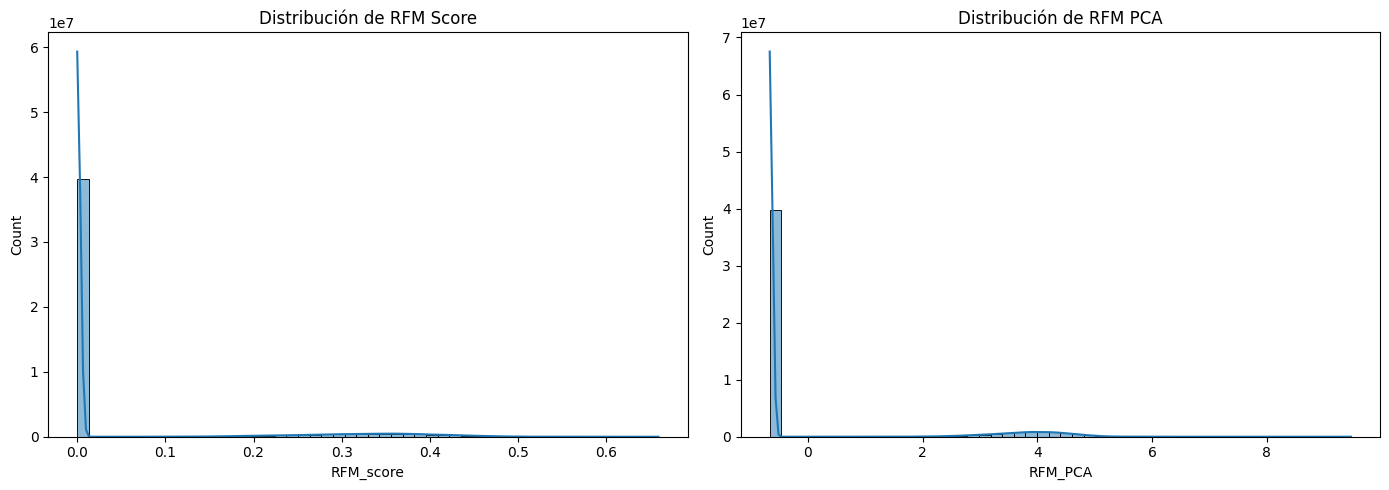

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(train_final["RFM_score"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribución de RFM Score")

sns.histplot(train_final["RFM_PCA"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribución de RFM PCA")

plt.tight_layout()
plt.show()


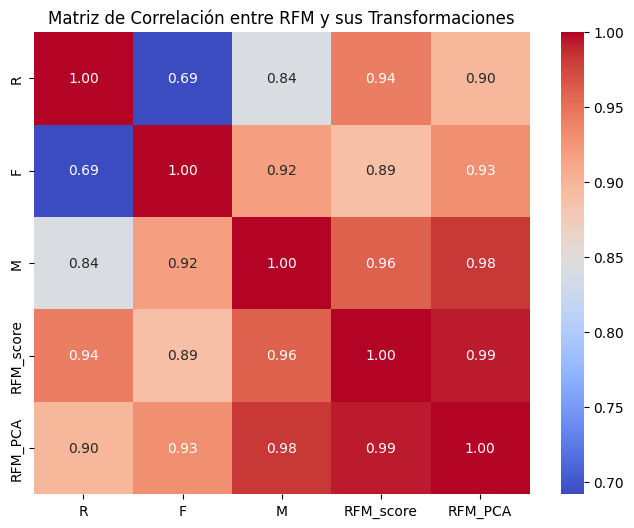

In [27]:
import numpy as np

corr_matrix = train_final[["R", "F", "M", "RFM_score", "RFM_PCA"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre RFM y sus Transformaciones")
plt.show()


/tmp/ipykernel_3636/2055004982.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='add_to_cart', y='RFM_score', data=train_final, palette='viridis')


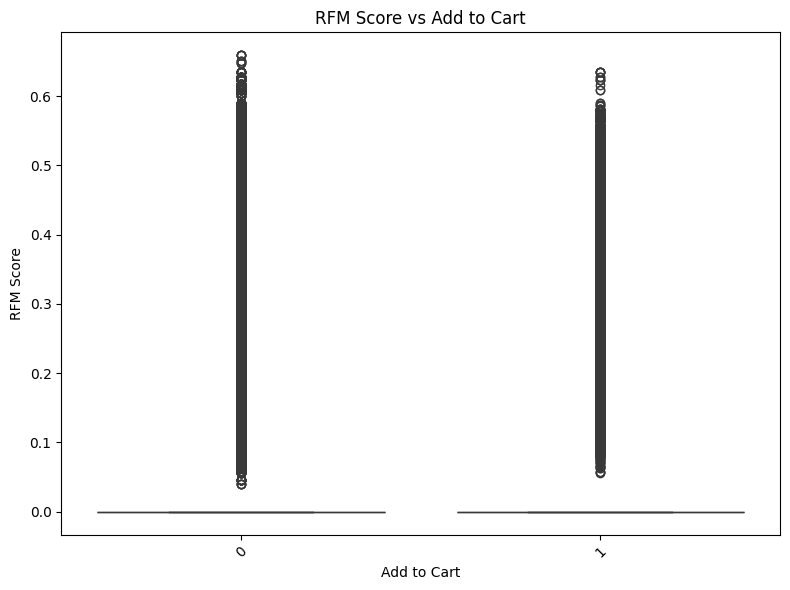

In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y el eje
plt.figure(figsize=(8, 6))

# Crear el boxplot
sns.boxplot(x='add_to_cart', y='RFM_score', data=train_final, palette='viridis')

# Personalizar la gráfica
plt.title("RFM Score vs Add to Cart")
plt.xlabel("Add to Cart")
plt.ylabel("RFM Score")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

/tmp/ipykernel_6273/1359250739.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='add_to_cart', y='RFM_PCA', data=train_final, palette='viridis')


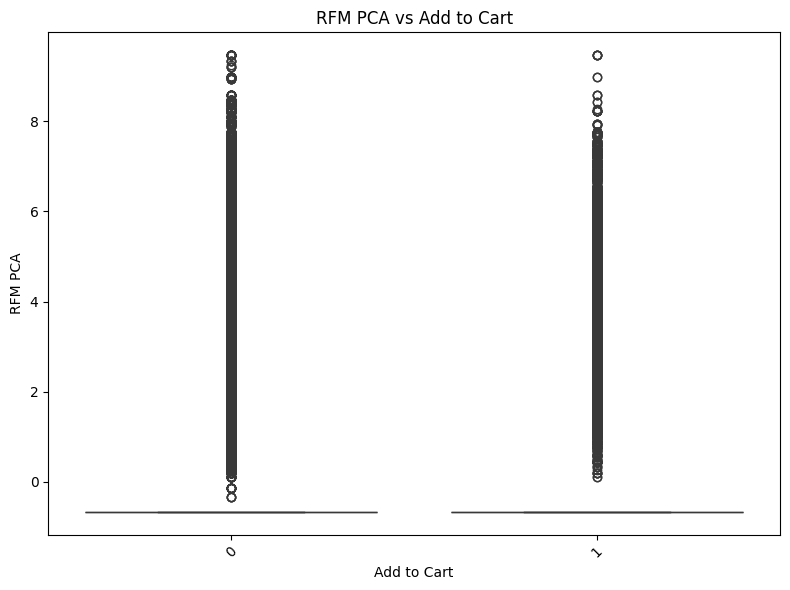

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y el eje
plt.figure(figsize=(8, 6))

# Crear el boxplot
sns.boxplot(x='add_to_cart', y='RFM_PCA', data=train_final, palette='viridis')

# Personalizar la gráfica
plt.title("RFM PCA vs Add to Cart")
plt.xlabel("Add to Cart")
plt.ylabel("RFM PCA")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar R, F, M
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(test_final[['R', 'F', 'M']])

# Aplicar PCA
pca = PCA(n_components=1)
test_final["RFM_PCA"] = pca.fit_transform(rfm_scaled)

- Nos quedamos con RFM_PCA, eliminamos las demás columnas


In [ ]:
# Eliminamos las columnas en Train y Test
columns_to_drop_train = ["R", "F", "M", "RFM_score", 'RFM_cluster']
columns_to_drop_test = ["R", "F", "M"]
train_final.drop(columns='RFM_cluster', inplace=True, errors="ignore")
test_final.drop(columns=columns_to_drop_test, inplace=True, errors="ignore")

# Confirmamos que las columnas han sido eliminadas
print(train_final.columns)
print(test_final.columns)


In [11]:
# Confirmamos que las columnas han sido eliminadas
print(train_final.columns)
print(test_final.columns)
print(train_final.info())
print(test_final.info())

Index(['session_id', 'date', 'timestamp_local', 'add_to_cart', 'user_id',
       'country', 'partnumber', 'device_type', 'embedding_reduced',
       'color_id_64', 'color_id_83', 'color_id_85', 'color_id_152',
       'color_id_307', 'color_id_397', 'color_id_otros', 'family_51',
       'family_53', 'family_73', 'family_146', 'family_153', 'family_156',
       'family_otros', 'pagetype_group', 'cod_section_group', 'RFM_PCA'],
      dtype='object')
Index(['session_id', 'date', 'timestamp_local', 'user_id', 'country',
       'partnumber', 'device_type', 'embedding_reduced', 'color_id_64',
       'color_id_83', 'color_id_85', 'color_id_152', 'color_id_307',
       'color_id_397', 'color_id_otros', 'family_51', 'family_53', 'family_73',
       'family_146', 'family_153', 'family_156', 'family_otros',
       'pagetype_group', 'cod_section_group', 'RFM_PCA'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 26 columns)

In [12]:
# Guardamos los datasets actualizados
train_final.to_parquet("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_cleaned.parquet", index=False)
test_final.to_parquet("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_cleaned.parquet", index=False)


- Validamos relación enr RFM y add_to_cart

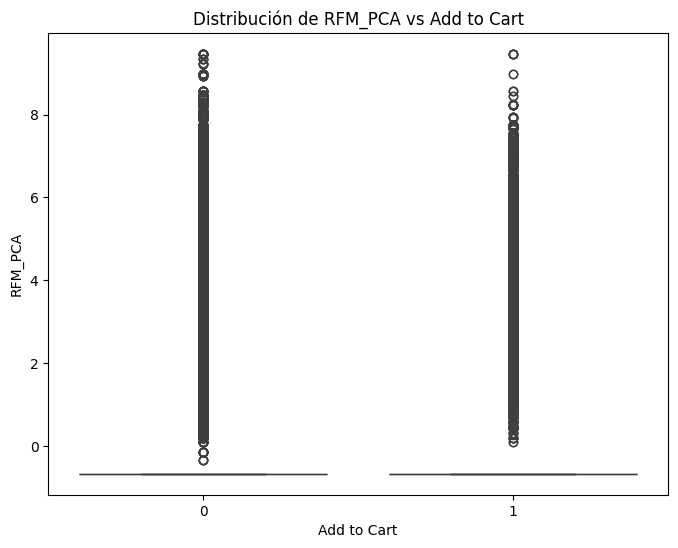

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para visualizar la distribución de RFM_PCA en función de add_to_cart
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_final["add_to_cart"], y=train_final["RFM_PCA"])
plt.title("Distribución de RFM_PCA vs Add to Cart")
plt.xlabel("Add to Cart")
plt.ylabel("RFM_PCA")
plt.show()

In [3]:
import numpy as np

# Aplicamos log(1 + RFM_PCA) para evitar logaritmos de cero
train_final["RFM_PCA_log"] = np.log1p(train_final["RFM_PCA"])
# test_final["RFM_PCA_log"] = np.log1p(test_final["RFM_PCA"])


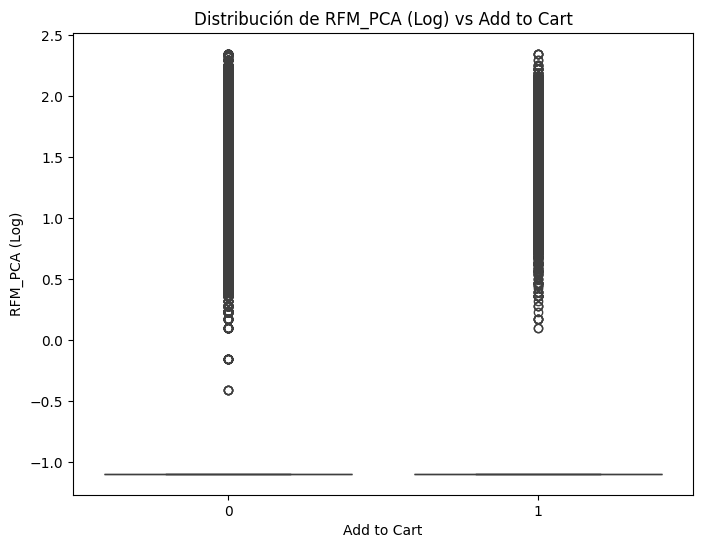

In [15]:
# Boxplot para visualizar la distribución de la versión transformada
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_final["add_to_cart"], y=train_final["RFM_PCA_log"])
plt.title("Distribución de RFM_PCA (Log) vs Add to Cart")
plt.xlabel("Add to Cart")
plt.ylabel("RFM_PCA (Log)")
plt.show()


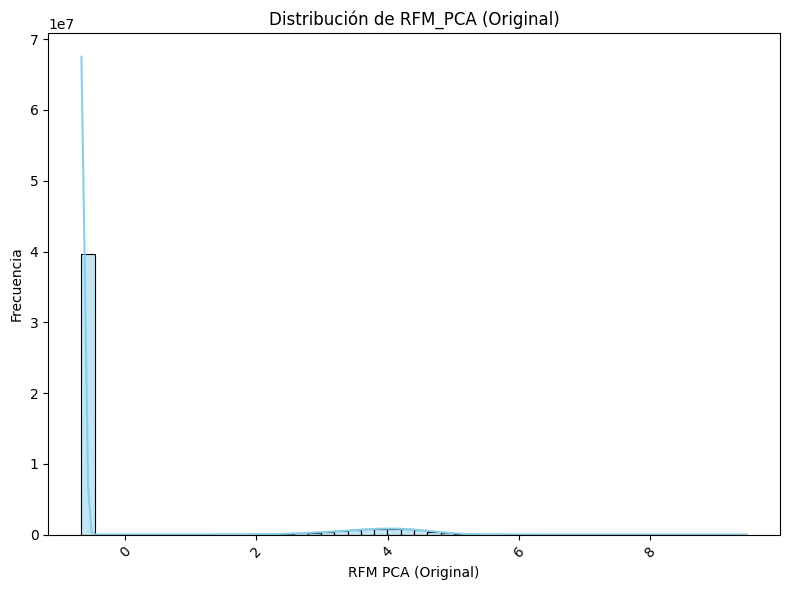

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y el eje para el histograma original
plt.figure(figsize=(8, 6))

# Crear el histograma con KDE para RFM_PCA (Original)
sns.histplot(
    data=train_final,
    x='RFM_PCA',
    bins=50,
    kde=True,
    color='skyblue'
)

# Personalizar la gráfica
plt.title("Distribución de RFM_PCA (Original)")
plt.xlabel("RFM PCA (Original)")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

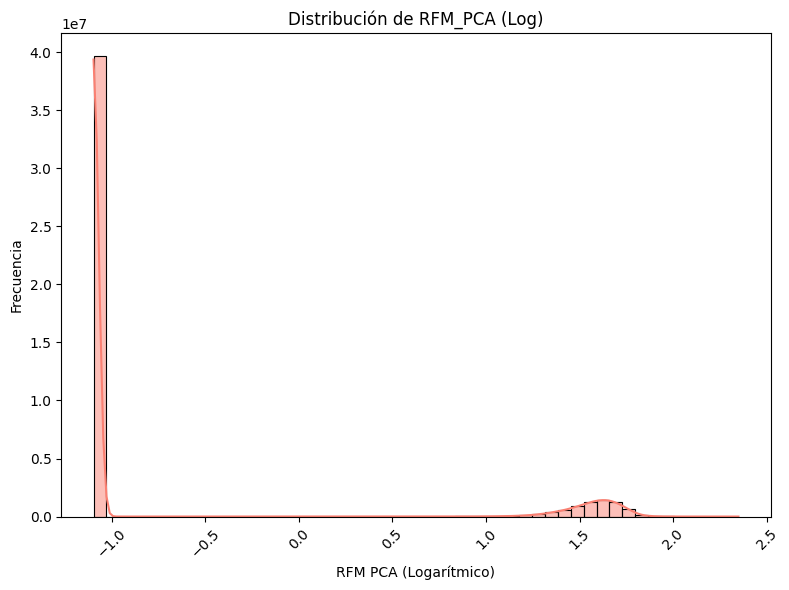

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y el eje para el histograma transformado logarítmicamente
plt.figure(figsize=(8, 6))

# Crear el histograma con KDE para RFM_PCA_log
sns.histplot(
    data=train_final,
    x='RFM_PCA_log',
    bins=50,
    kde=True,
    color='salmon'
)

# Personalizar la gráfica
plt.title("Distribución de RFM_PCA (Log)")
plt.xlabel("RFM PCA (Logarítmico)")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Revisamos tipos de datos

In [1]:
import pandas as pd
train_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_cleaned.parquet')

In [2]:
train_final.dtypes

session_id                    int32
date                 datetime64[ns]
timestamp_local      datetime64[ns]
add_to_cart                    int8
user_id                       int32
country                        int8
partnumber                    int32
device_type                    int8
embedding_reduced            object
color_id_64                    bool
color_id_83                    bool
color_id_85                    bool
color_id_152                   bool
color_id_307                   bool
color_id_397                   bool
color_id_otros                 bool
family_51                      bool
family_53                      bool
family_73                      bool
family_146                     bool
family_153                     bool
family_156                     bool
family_otros                   bool
pagetype_group               object
cod_section_group             int64
RFM_PCA                     float32
dtype: object

In [3]:
# Peso total del DataFrame en memoria
print(f"🔍 Peso del DataFrame: {train_final.memory_usage(deep=True).sum() / (1024**3):.2f} GB")


🔍 Peso del DataFrame: 10.46 GB


In [4]:
# 📌 Extraer solo la hora de timestamp_local y eliminar columnas de fecha
train_final["hour"] = train_final["timestamp_local"].dt.hour.astype("int8")
train_final.drop(columns=["date", "timestamp_local"], inplace=True)

# 📌 Convertir tipos de datos para optimizar memoria
train_final["device_type"] = train_final["device_type"].astype("category")
train_final["cod_section_group"] = train_final["cod_section_group"].astype("int8")  # o "category"

# 📌 Eliminar columnas innecesarias de one-hot encoding
drop_columns = [col for col in train_final.columns if col.startswith("color_id_")]
drop_columns += [col for col in train_final.columns if col.startswith("family_")]

train_final.drop(columns=drop_columns, inplace=True)

print("✅ Cambios aplicados: Eliminadas fechas y one-hot, convertidos tipos.")

✅ Cambios aplicados: Eliminadas fechas y one-hot, convertidos tipos.


In [10]:
# Peso total del DataFrame en memoria
print(f"🔍 Peso del DataFrame: {train_final.memory_usage(deep=True).sum() / (1024**3):.2f} GB")


🔍 Peso del DataFrame: 8.90 GB


In [11]:
train_final.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 11 columns):
 #   Column             Dtype   
---  ------             -----   
 0   session_id         int32   
 1   add_to_cart        int8    
 2   user_id            int32   
 3   country            int8    
 4   partnumber         int32   
 5   device_type        category
 6   embedding_reduced  object  
 7   pagetype_group     object  
 8   cod_section_group  int8    
 9   RFM_PCA            float32 
 10  hour               int8    
dtypes: category(1), float32(1), int32(3), int8(4), object(2)
memory usage: 8.9 GB


In [13]:
products_df = products_df[['partnumber', 'color_id', 'family']]
train_final = train_final.merge(products_df, on='partnumber', how='left')

In [17]:
# Convertir color_id y family a int16 si cumplen con el rango
if train_final["color_id"].max() < 32767:
    train_final["color_id"] = train_final["color_id"].astype("int16")

if train_final["family"].max() < 32767:
    train_final["family"] = train_final["family"].astype("int16")

# Convertir pagetype_group a category
train_final["pagetype_group"] = train_final["pagetype_group"].astype("category")


In [18]:
train_final.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 13 columns):
 #   Column             Dtype   
---  ------             -----   
 0   session_id         int32   
 1   add_to_cart        int8    
 2   user_id            int32   
 3   country            int8    
 4   partnumber         int32   
 5   device_type        category
 6   embedding_reduced  object  
 7   pagetype_group     category
 8   cod_section_group  int8    
 9   RFM_PCA            float32 
 10  hour               int8    
 11  color_id           int16   
 12  family             int16   
dtypes: category(2), float32(1), int16(2), int32(3), int8(4), object(1)
memory usage: 6.3 GB


In [19]:
train_final.to_parquet("/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_cleaned.parquet", index=False)

### Análisis de Embeddings

In [ ]:
# import pandas as pd

# train_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_cleaned.parquet')
# test_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_cleaned.parquet')

In [2]:
print(train_final.info())
print(test_final.info())
print('----------------------')
print(train_final.head())
print(test_final.head())
print('----------------------')
print(train_final.describe())
print(test_final.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 26 columns):
 #   Column             Dtype         
---  ------             -----         
 0   session_id         int32         
 1   date               datetime64[ns]
 2   timestamp_local    datetime64[ns]
 3   add_to_cart        int8          
 4   user_id            int32         
 5   country            int8          
 6   partnumber         int32         
 7   device_type        int8          
 8   embedding_reduced  object        
 9   color_id_64        bool          
 10  color_id_83        bool          
 11  color_id_85        bool          
 12  color_id_152       bool          
 13  color_id_307       bool          
 14  color_id_397       bool          
 15  color_id_otros     bool          
 16  family_51          bool          
 17  family_53          bool          
 18  family_73          bool          
 19  family_146         bool          
 20  family_153         boo

#### PCA20 de embeddings

- Train

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# 📌 1️⃣ Cargar los datos
train_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_cleaned.parquet')

In [2]:
train_final.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 13 columns):
 #   Column             Dtype   
---  ------             -----   
 0   session_id         int32   
 1   add_to_cart        int8    
 2   user_id            int32   
 3   country            int8    
 4   partnumber         int32   
 5   device_type        int8    
 6   embedding_reduced  object  
 7   pagetype_group     category
 8   cod_section_group  int8    
 9   RFM_PCA            float32 
 10  hour               int8    
 11  color_id           int16   
 12  family             int16   
dtypes: category(1), float32(1), int16(2), int32(3), int8(5), object(1)
memory usage: 6.3 GB


In [2]:
# 📌 2️⃣ Extraer embeddings como matriz NumPy
X_train = np.vstack(train_final.pop("embedding_reduced").values)

In [3]:
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)

In [4]:
del pca, X_train 

In [5]:
pca_columns = [f"embedding_pca_{i+1}" for i in range(20)]
train_final[pca_columns] = X_train_pca  # Agregar columnas directamente


In [6]:
train_final.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551445 entries, 0 to 46551444
Data columns (total 32 columns):
 #   Column             Dtype   
---  ------             -----   
 0   session_id         int32   
 1   add_to_cart        int8    
 2   user_id            int32   
 3   country            int8    
 4   partnumber         int32   
 5   device_type        int8    
 6   pagetype_group     category
 7   cod_section_group  int8    
 8   RFM_PCA            float32 
 9   hour               int8    
 10  color_id           int16   
 11  family             int16   
 12  embedding_pca_1    float32 
 13  embedding_pca_2    float32 
 14  embedding_pca_3    float32 
 15  embedding_pca_4    float32 
 16  embedding_pca_5    float32 
 17  embedding_pca_6    float32 
 18  embedding_pca_7    float32 
 19  embedding_pca_8    float32 
 20  embedding_pca_9    float32 
 21  embedding_pca_10   float32 
 22  embedding_pca_11   float32 
 23  embedding_pca_12   float32 
 24  embedding_pca_13   flo

In [7]:
train_final.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/train_final_pca20.parquet', index=False)

- Test

In [27]:
import pandas as pd
test_final = pd.read_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_cleaned.parquet')

In [28]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   session_id         29275 non-null  int32         
 1   date               29275 non-null  datetime64[ns]
 2   timestamp_local    29275 non-null  datetime64[ns]
 3   user_id            29275 non-null  int32         
 4   country            29275 non-null  int8          
 5   partnumber         29275 non-null  int32         
 6   device_type        29275 non-null  int8          
 7   embedding_reduced  29275 non-null  object        
 8   color_id_64        29275 non-null  bool          
 9   color_id_83        29275 non-null  bool          
 10  color_id_85        29275 non-null  bool          
 11  color_id_152       29275 non-null  bool          
 12  color_id_307       29275 non-null  bool          
 13  color_id_397       29275 non-null  bool          
 14  color_

In [29]:
columns_to_drop = [col for col in test_final.columns if col.startswith("color_id_") or col.startswith("family_")]
test_final.drop(columns=columns_to_drop, inplace=True)

In [31]:
test_final.describe()

,session_id,date,timestamp_local,user_id,country,partnumber,device_type,cod_section_group,RFM_PCA
count,2.927500e+04,29275,29275,29275.000000,29275.000000,29275.000000,29275.000000,29275.000000,2.927500e+04
mean,2.602346e+06,2024-06-15 12:09:13.373185280,2024-06-16 01:07:58.761897472,52420.586268,34.260495,22085.171238,1.213185,1.500837,-2.163073e-08
min,7.460000e+02,2024-06-15 00:00:00,2024-06-15 00:00:35.309000,-1.000000,25.000000,3.000000,1.000000,1.000000,-7.919707e-01
25%,1.318920e+06,2024-06-15 00:00:00,2024-06-15 13:45:43.255499776,-1.000000,25.000000,11544.500000,1.000000,1.000000,-7.919707e-01
50%,2.619119e+06,2024-06-16 00:00:00,2024-06-16 00:16:00.219000064,-1.000000,34.000000,21777.000000,1.000000,1.000000,-7.919707e-01
75%,3.904801e+06,2024-06-16 00:00:00,2024-06-16 14:08:17.384000,-1.000000,34.000000,32864.000000,1.000000,2.000000,-7.919707e-01
max,5.168933e+06,2024-06-16 00:00:00,2024-06-16 23:55:50.519000,555819.000000,57.000000,43679.000000,3.000000,3.000000,6.060715e+00
std,1.496322e+06,NaN,NaN,126904.770441,10.539929,12502.857230,0.603799,0.832709,1.620975e+00


In [32]:
test_final = test_final.merge(products_df[['partnumber', 'color_id', 'family']], on='partnumber', how='left')


In [33]:
test_final["device_type"] = test_final["device_type"].astype("int8")
test_final["cod_section_group"] = test_final["cod_section_group"].astype("int8")
test_final["color_id"] = test_final["color_id"].astype("int16")
test_final["family"] = test_final["family"].astype("int16")

In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

X_test = np.vstack(test_final["embedding_reduced"].values)
pca = PCA(n_components=20)
X_test_pca = pca.fit_transform(X_test) 

In [35]:
pca_columns = [f"embedding_pca_{i+1}" for i in range(20)]
test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns, index=test_final.index)

In [36]:
test_final.drop(columns=["embedding_reduced"], inplace=True)

In [37]:
test_final = pd.concat([test_final, test_pca_df], axis=1)

In [39]:
test_final["timestamp_local"] = pd.to_datetime(test_final["timestamp_local"], errors="coerce")

# test_final Extraer correctamente la hora
test_final["hour"] = test_final["timestamp_local"].dt.hour.astype("int8")

# 3️⃣ Eliminar columnas innecesarias
test_final.drop(columns=["date", "timestamp_local"], inplace=True)

In [40]:
test_final.head()

,session_id,user_id,country,partnumber,device_type,pagetype_group,cod_section_group,RFM_PCA,color_id,family,...,embedding_pca_12,embedding_pca_13,embedding_pca_14,embedding_pca_15,embedding_pca_16,embedding_pca_17,embedding_pca_18,embedding_pca_19,embedding_pca_20,hour
0,746,-1,57,1254,1,General,1,-0.791971,404,30,...,-0.166522,-0.591889,-0.691219,-1.095011,1.831037,-0.939990,-0.115419,1.412011,-0.312078,18
1,746,-1,57,32544,1,General,1,-0.791971,219,146,...,-0.265075,2.802500,3.167187,0.315531,1.435483,1.556529,-1.135361,-0.702983,-0.075746,18
2,746,-1,57,12639,1,General,1,-0.791971,83,53,...,-0.045697,-0.359353,-0.962956,0.934522,1.025192,0.435238,-0.460665,-0.035840,0.017853,18
3,746,-1,57,18048,1,General,1,-0.791971,53,29,...,-0.502604,2.760225,-1.947460,-0.126410,-2.121139,0.604457,-0.399004,0.882454,0.095006,18
4,746,-1,57,13295,1,General,1,-0.791971,181,51,...,0.350443,-0.426342,0.922480,-0.725924,-0.813752,-1.467379,0.094024,-0.146192,-0.861163,18


In [41]:
test_final["pagetype_group"] = test_final["pagetype_group"].astype("category")

In [42]:
test_final = test_final.astype({
    "session_id": "int32",
    "user_id": "int32",
    "country": "int8",
    "partnumber": "int32",
    "device_type": "int8",
    "cod_section_group": "int8",
    "color_id": "int16",
    "family": "int16",
    "RFM_PCA": "float32",
})

In [43]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29275 entries, 0 to 29274
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   session_id         29275 non-null  int32   
 1   user_id            29275 non-null  int32   
 2   country            29275 non-null  int8    
 3   partnumber         29275 non-null  int32   
 4   device_type        29275 non-null  int8    
 5   pagetype_group     29275 non-null  category
 6   cod_section_group  29275 non-null  int8    
 7   RFM_PCA            29275 non-null  float32 
 8   color_id           29275 non-null  int16   
 9   family             29275 non-null  int16   
 10  embedding_pca_1    29275 non-null  float32 
 11  embedding_pca_2    29275 non-null  float32 
 12  embedding_pca_3    29275 non-null  float32 
 13  embedding_pca_4    29275 non-null  float32 
 14  embedding_pca_5    29275 non-null  float32 
 15  embedding_pca_6    29275 non-null  float32 
 16  embe

In [26]:
test_final.head()

,session_id,user_id,country,partnumber,device_type,pagetype_group,cod_section_group,RFM_PCA,color_id,family,...,embedding_pca_12,embedding_pca_13,embedding_pca_14,embedding_pca_15,embedding_pca_16,embedding_pca_17,embedding_pca_18,embedding_pca_19,embedding_pca_20,hour
0,746,-1,57,1254,1,General,1,-0.791971,404,30,...,-0.166522,-0.591889,-0.691219,-1.095011,1.831037,-0.939990,-0.115419,1.412011,-0.312078,0
1,746,-1,57,32544,1,General,1,-0.791971,219,146,...,-0.265075,2.802500,3.167187,0.315531,1.435483,1.556529,-1.135361,-0.702983,-0.075746,0
2,746,-1,57,12639,1,General,1,-0.791971,83,53,...,-0.045697,-0.359353,-0.962956,0.934522,1.025192,0.435238,-0.460665,-0.035840,0.017853,0
3,746,-1,57,18048,1,General,1,-0.791971,53,29,...,-0.502604,2.760225,-1.947460,-0.126410,-2.121139,0.604457,-0.399004,0.882454,0.095006,0
4,746,-1,57,13295,1,General,1,-0.791971,181,51,...,0.350443,-0.426342,0.922480,-0.725924,-0.813752,-1.467379,0.094024,-0.146192,-0.861163,0


In [44]:
test_final.to_parquet('/home/pablost/Hackathon_inditex_data_science/hackathon-inditex-data-recommender/data/processed/last/test_final_aligned.parquet', index=False)